#                                      # FitBit CAPSTONE PROJECT

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, roc_auc_score



In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings('ignore')

In [3]:
#pip install -U seaborn
#! pip install --upgrade matplotlib
#!pip install missingno

In [4]:
!pip install yellowbrick

In [5]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [6]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

# 1. Exploratory Data Analysis


In [7]:
exercise_minitues_records_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/exercise_minitues_records.csv")
exercise_minitues_records_

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance
0    1503960366   4/12/2016               728                   328                   13                 25                    0.000                6.060                     0.550               1.880
1    1503960366   4/13/2016               776                   217                   19                 21                    0.000                4.710                     0.690               1.570
2    1503960366   4/14/2016              1218                   181                   11                 30                    0.000                3.910                     0.400               2.440
3    1503960366   4/15/2016               726                   209                   34                 29                    0.000                2.830                     1.260               2.140
4    1503960366   4/16/2016               773                   221                   10                 36                    0.000                5.040                     0.410               2.710
..          ...         ...               ...                   ...                  ...                ...                      ...                  ...                       ...                 ...
935  8877689391    5/8/2016              1174                   245                    4                 17                    0.000                6.800                     0.200               1.080
936  8877689391    5/9/2016              1131                   217                   19                 73                    0.050                6.240                     0.800              11.100
937  8877689391   5/10/2016              1187                   224                   11                 18                    0.000                6.280                     0.460               1.350
938  8877689391   5/11/2016              1127                   213                   12                 88                    0.000                5.890                     0.410              13.220
939  8877689391   5/12/2016               770                   137                    1                 23                    0.000                4.250                     0.040               1.820

[940 rows x 10 columns]

In [8]:
exercise_minitues_records = exercise_minitues_records_.drop(["Id", "ActivityDay", "SedentaryActiveDistance","LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance" ], axis=1)
exercise_minitues_records

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes
0                 728                   328                   13                 25
1                 776                   217                   19                 21
2                1218                   181                   11                 30
3                 726                   209                   34                 29
4                 773                   221                   10                 36
..                ...                   ...                  ...                ...
935              1174                   245                    4                 17
936              1131                   217                   19                 73
937              1187                   224                   11                 18
938              1127                   213                   12                 88
939               770                   137                    1                 23

[940 rows x 4 columns]

In [9]:
heartrate_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/heartrate.csv", skiprows=range(1, 25), nrows=941)
heartrate_.head()

Id                  Time  Value
0  2022484408  4/12/2016 7:24:40 AM     56
1  2022484408  4/12/2016 7:24:50 AM     58
2  2022484408  4/12/2016 7:25:05 AM     57
3  2022484408  4/12/2016 7:25:10 AM     58
4  2022484408  4/12/2016 7:25:15 AM     60

In [10]:
heartrate = heartrate_.drop(["Id", "Time"], axis=1)
heartrate.rename(columns={"Value": "heartrate"}, inplace=True)
heartrate

heartrate
0           56
1           58
2           57
3           58
4           60
..         ...
936         85
937         81
938         79
939         75
940         72

[941 rows x 1 columns]

In [11]:
total_minutes_sleep_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_minutes_sleep.csv")
total_minutes_sleep_

Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
0    1503960366  4/12/2016 12:00:00 AM                  1                 327             346
1    1503960366  4/13/2016 12:00:00 AM                  2                 384             407
2    1503960366  4/15/2016 12:00:00 AM                  1                 412             442
3    1503960366  4/16/2016 12:00:00 AM                  2                 340             367
4    1503960366  4/17/2016 12:00:00 AM                  1                 700             712
..          ...                    ...                ...                 ...             ...
408  8792009665  4/30/2016 12:00:00 AM                  1                 343             360
409  8792009665   5/1/2016 12:00:00 AM                  1                 503             527
410  8792009665   5/2/2016 12:00:00 AM                  1                 415             423
411  8792009665   5/3/2016 12:00:00 AM                  1                 516             545
412  8792009665   5/4/2016 12:00:00 AM                  1                 439             463

[413 rows x 5 columns]

In [12]:
total_minutes_sleep = total_minutes_sleep_.drop(["Id", "SleepDay", "TotalSleepRecords"], axis=1)
total_minutes_sleep

TotalMinutesAsleep  TotalTimeInBed
0                   327             346
1                   384             407
2                   412             442
3                   340             367
4                   700             712
..                  ...             ...
408                 343             360
409                 503             527
410                 415             423
411                 516             545
412                 439             463

[413 rows x 2 columns]

In [13]:
total_steps_= pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_steps.csv")
total_steps_


Id ActivityDay  StepTotal
0    1503960366   4/12/2016      13162
1    1503960366   4/13/2016      10735
2    1503960366   4/14/2016      10460
3    1503960366   4/15/2016       9762
4    1503960366   4/16/2016      12669
..          ...         ...        ...
935  8877689391    5/8/2016      10686
936  8877689391    5/9/2016      20226
937  8877689391   5/10/2016      10733
938  8877689391   5/11/2016      21420
939  8877689391   5/12/2016       8064

[940 rows x 3 columns]

In [14]:
total_steps = total_steps_.drop(["Id", "ActivityDay"], axis=1)
total_steps.head()

StepTotal
0      13162
1      10735
2      10460
3       9762
4      12669

In [15]:
df_ = pd.concat([exercise_minitues_records, heartrate, total_minutes_sleep, total_steps], axis=1)
df = df_.copy()
df.head(10)

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0           728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1           776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2          1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3           726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000
4           773.000               221.000               10.000             36.000         60             700.000         712.000  12669.000
5           539.000               164.000               20.000             38.000         60             304.000         320.000   9705.000
6          1149.000               233.000               16.000             42.000         58             360.000         377.000  13019.000
7           775.000               264.000               31.000             50.000         57             325.000         364.000  15506.000
8           818.000               205.000               12.000             28.000         55             361.000         384.000  10544.000
9           838.000               211.000                8.000             19.000         54             430.000         449.000   9819.000

In [16]:
#Veriye genel bakış
def check_df(dataframe, head=5):
    print("################# SHAPE ####################")
    print(dataframe.shape)
    print("################# TYPES ####################")
    print(dataframe.dtypes)
    print("################# HEAD ####################")
    print(dataframe.head(head))
    print("################# TAİL ####################")
    print(dataframe.tail(head))
    print("################# NA ####################")
    print(dataframe.isnull().sum())
    print("################# QUANTİLES ####################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
check_df(df)

################# SHAPE ####################
(941, 8)
################# TYPES ####################
SedentaryMinutes        float64
LightlyActiveMinutes    float64
FairlyActiveMinutes     float64
VeryActiveMinutes       float64
heartrate                 int64
TotalMinutesAsleep      float64
TotalTimeInBed          float64
StepTotal               float64
dtype: object
################# HEAD ####################
   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0           728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1           776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2          1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3           726.000        

In [17]:
#Değişkenleri Yakalama
#cat_th<10 --> cat_cols
#car_th>20 --> car_th
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]               #önce kategorik değişkenler seçilir

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and    #numerik ama kategorikler seçilir.
                   dataframe[col].dtypes != "O"]

    # eğer bir kategorik değişkeni 20 den büyükse aynı zamanda tipi de kategorikse bu değişken kategorik değildir. kategorik gibi duruyorsun ama kardinel. yani ölçülebilirliği yok. eşsiz çok fazla sınıfın var.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 941
Variables: 8
cat_cols: 0
num_cols: 8
cat_but_car: 0
num_but_cat: 0


In [18]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

count    940.000
mean     991.211
std      301.267
min        0.000
5%       536.700
10%      621.000
20%      707.800
30%      757.000
40%      852.600
50%     1057.500
60%     1122.000
70%     1191.300
80%     1272.600
90%     1410.300
95%     1440.000
99%     1440.000
max     1440.000
Name: SedentaryMinutes, dtype: float64


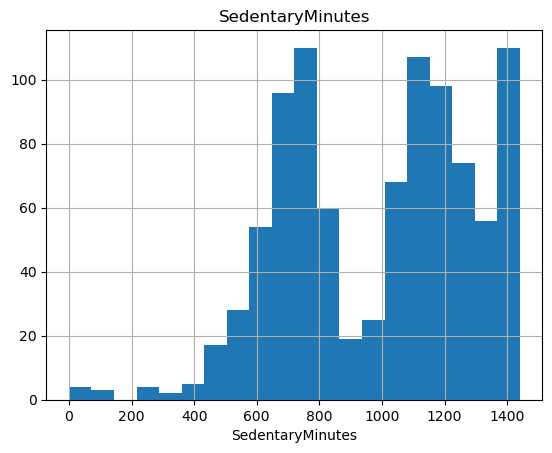

count   940.000
mean    192.813
std     109.175
min       0.000
5%        0.000
10%       3.900
20%     103.600
30%     142.700
40%     171.600
50%     199.000
60%     225.000
70%     250.000
80%     283.000
90%     330.000
95%     369.050
99%     436.270
max     518.000
Name: LightlyActiveMinutes, dtype: float64


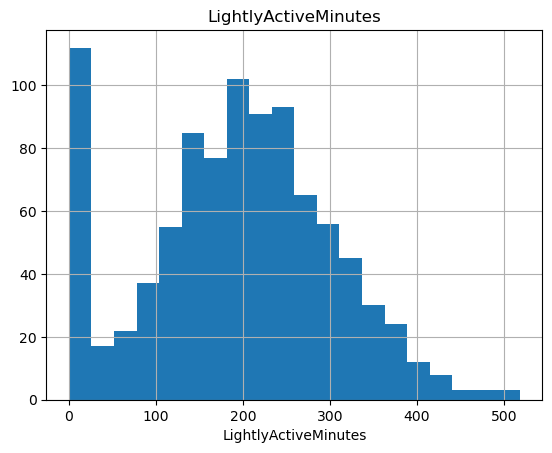

count   940.000
mean     13.565
std      19.987
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       6.000
60%      10.000
70%      16.000
80%      23.000
90%      38.000
95%      51.000
99%      95.000
max     143.000
Name: FairlyActiveMinutes, dtype: float64


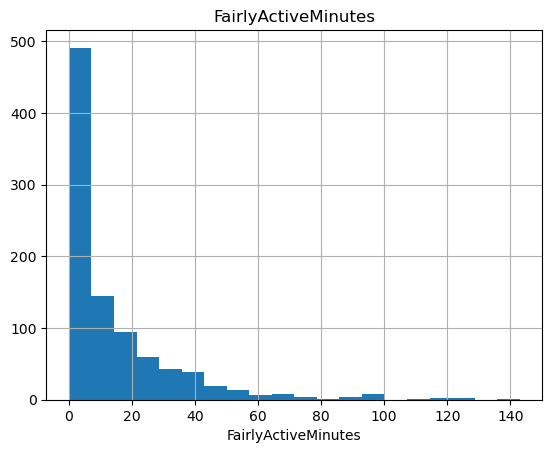

count   940.000
mean     21.165
std      32.845
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       4.000
60%      12.000
70%      24.000
80%      41.000
90%      66.000
95%      93.050
99%     125.000
max     210.000
Name: VeryActiveMinutes, dtype: float64


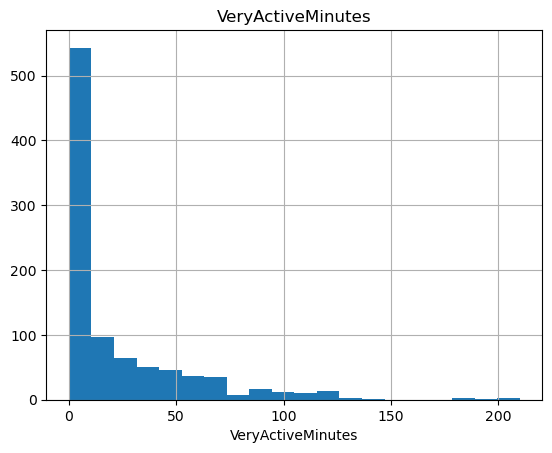

count   941.000
mean     71.798
std      14.324
min      52.000
5%       56.000
10%      57.000
20%      59.000
30%      60.000
40%      62.000
50%      66.000
60%      76.000
70%      81.000
80%      85.000
90%      92.000
95%     100.000
99%     106.000
max     112.000
Name: heartrate, dtype: float64


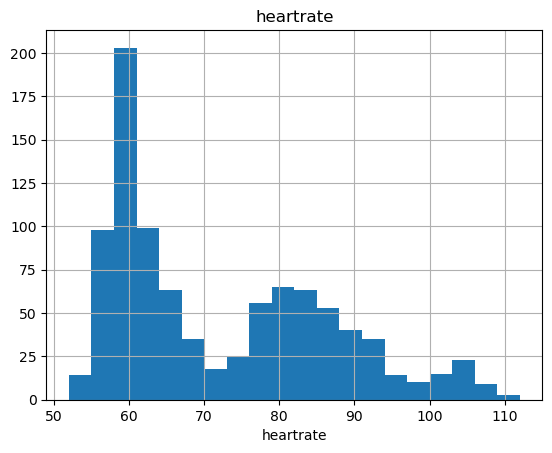

count   413.000
mean    419.467
std     118.345
min      58.000
5%      169.000
10%     283.400
20%     342.400
30%     381.600
40%     410.600
50%     433.000
60%     452.000
70%     475.400
80%     506.600
90%     534.600
95%     590.400
99%     699.040
max     796.000
Name: TotalMinutesAsleep, dtype: float64


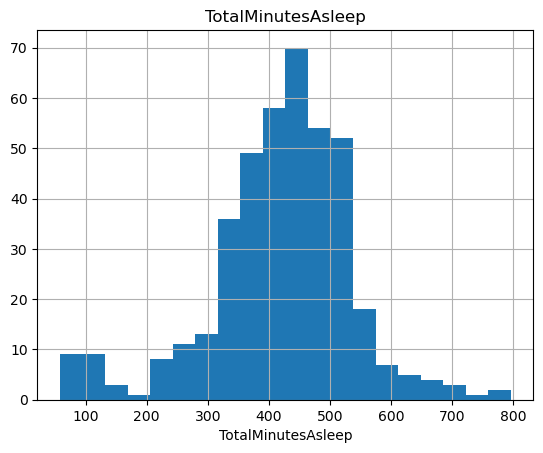

count   413.000
mean    458.639
std     127.102
min      61.000
5%      220.400
10%     338.800
20%     386.000
30%     417.000
40%     445.800
50%     463.000
60%     490.200
70%     510.000
80%     543.000
90%     568.000
95%     629.200
99%     834.840
max     961.000
Name: TotalTimeInBed, dtype: float64


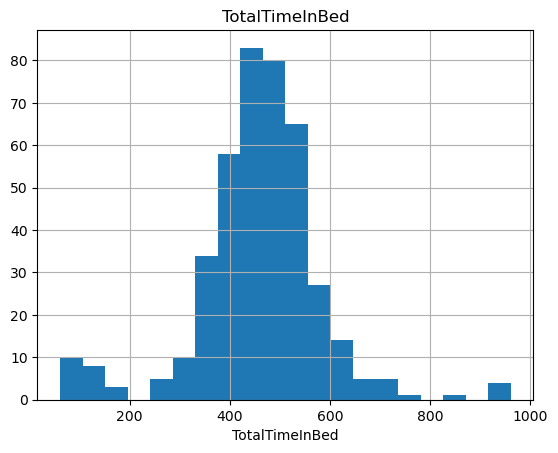

count     940.000
mean     7637.911
std      5087.151
min         0.000
5%          0.000
10%       253.000
20%      2991.800
30%      4690.700
40%      6116.600
50%      7405.500
60%      8865.400
70%     10165.600
80%     11599.000
90%     13959.600
95%     15485.100
99%     21909.390
max     36019.000
Name: StepTotal, dtype: float64


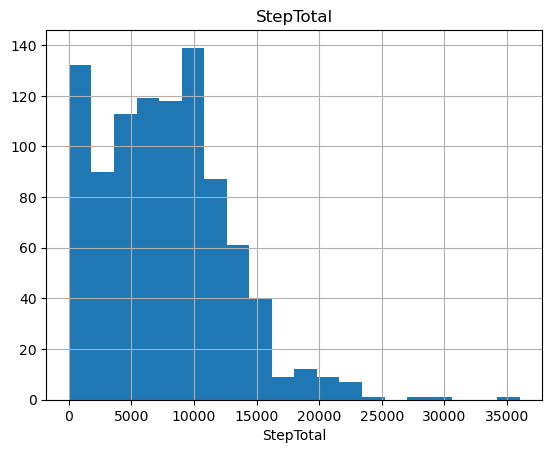

In [19]:
#numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# 2. Data Preprocessing & Feature Engineering


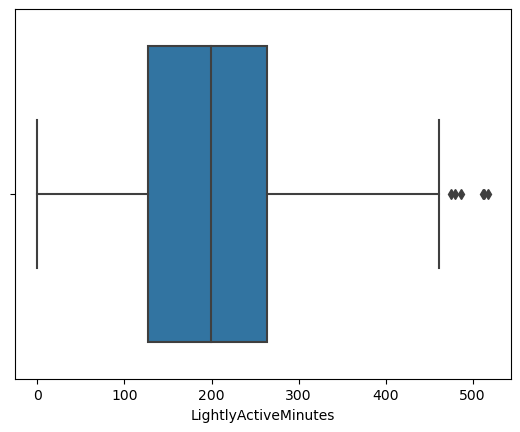

In [20]:
#Aykırı gözlem analizi
sns.boxplot(x=df["LightlyActiveMinutes"])
plt.show()

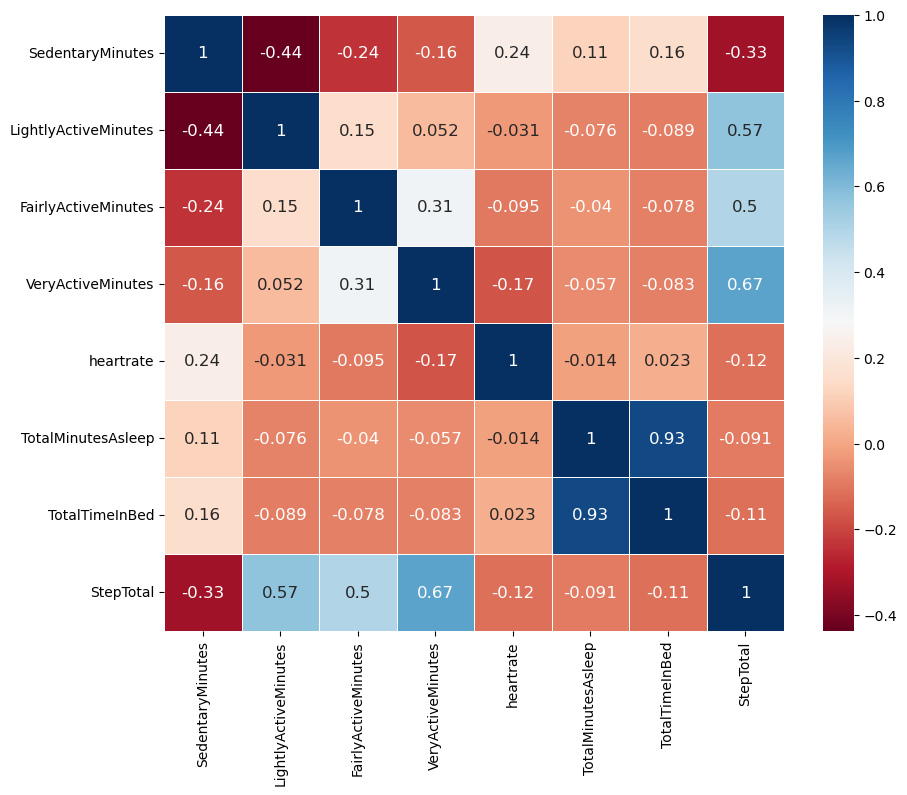

In [21]:
# Sayısal değişkenkerin birbirleri ile korelasyonu
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)
correlation_matrix(df, num_cols)

In [22]:
def outlier_thresholds(dataframe,col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile( q1 )
  quartile3 = dataframe[col_name].quantile( q3 )
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [23]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  #aykırı değer varsa true döner.
    else:
        return False 

In [24]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes True
FairlyActiveMinutes True
VeryActiveMinutes True
heartrate False
TotalMinutesAsleep True
TotalTimeInBed True
StepTotal True


In [25]:
#aykırı değerlerin kendilerine erişmek için:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
#grab_outliers(df, "FairlyActiveMinutes")

In [26]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000
..                ...                   ...                  ...                ...        ...                 ...             ...        ...
936          1131.000               217.000               19.000             73.000         85                 NaN             NaN  20226.000
937          1187.000               224.000               11.000             18.000         81                 NaN             NaN  10733.000
938          1127.000               213.000               12.000             80.000         79                 NaN             NaN  21132.875
939           770.000               137.000                1.000             23.000         75                 NaN             NaN   8064.000
940               NaN                   NaN                  NaN                NaN         72                 NaN             NaN        NaN

[941 rows x 8 columns]

In [27]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes False
FairlyActiveMinutes False
VeryActiveMinutes False
heartrate False
TotalMinutesAsleep False
TotalTimeInBed False
StepTotal False


In [28]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

count     mean      std     min      1%      5%      50%       75%       90%       99%       max
SedentaryMinutes     940.000  991.211  301.267   0.000 247.240 536.700 1057.500  1229.500  1410.300  1440.000  1440.000
LightlyActiveMinutes 940.000  192.634  108.688   0.000   0.000   0.000  199.000   264.000   330.000   436.270   469.500
FairlyActiveMinutes  940.000   12.022   14.826   0.000   0.000   0.000    6.000    19.000    38.000    47.500    47.500
VeryActiveMinutes    940.000   18.905   25.884   0.000   0.000   0.000    4.000    32.000    66.000    80.000    80.000
heartrate            941.000   71.798   14.324  52.000  54.000  56.000   66.000    83.000    92.000   106.000   112.000
TotalMinutesAsleep   413.000  422.105  107.147 167.500 167.500 169.600  433.000   490.000   534.600   683.500   683.500
TotalTimeInBed       413.000  461.266  102.991 218.500 218.500 236.200  463.000   526.000   568.000   710.500   710.500
StepTotal            940.000 7593.395 4929.347   0.000   0.000   0.000 7405.500 10727.000 13959.600 21132.875 21132.875

In [29]:
# Missing Values (Eksik Değerler)
df.isnull().values.any()

True

In [30]:
df.notnull().sum()


SedentaryMinutes        940
LightlyActiveMinutes    940
FairlyActiveMinutes     940
VeryActiveMinutes       940
heartrate               941
TotalMinutesAsleep      413
TotalTimeInBed          413
StepTotal               940
dtype: int64

In [31]:
df.isnull().sum()

SedentaryMinutes          1
LightlyActiveMinutes      1
FairlyActiveMinutes       1
VeryActiveMinutes         1
heartrate                 0
TotalMinutesAsleep      528
TotalTimeInBed          528
StepTotal                 1
dtype: int64

In [32]:
#equal=o // hangi değişkende kaç tane 0 var.
df.eq(0).sum()

SedentaryMinutes          1
LightlyActiveMinutes     84
FairlyActiveMinutes     384
VeryActiveMinutes       409
heartrate                 0
TotalMinutesAsleep        0
TotalTimeInBed            0
StepTotal                77
dtype: int64

In [33]:
#na_cols=eksik değerlerin olduğu kolonlar
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['SedentaryMinutes',
 'LightlyActiveMinutes',
 'FairlyActiveMinutes',
 'VeryActiveMinutes',
 'TotalMinutesAsleep',
 'TotalTimeInBed',
 'StepTotal']

In [34]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    #eksik değer sayısı için;
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    #eksik değer oranı için;
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    #axis=1 ,sütunlara göre birleştirme işlemi yapmak istiyorum.
    #np.round(..) virgülden sonraki basamakla ilgili bir ayarlama yapılmış.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


In [35]:
missing_values_table(df, True)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


['SedentaryMinutes',
 'LightlyActiveMinutes',
 'FairlyActiveMinutes',
 'VeryActiveMinutes',
 'TotalMinutesAsleep',
 'TotalTimeInBed',
 'StepTotal']

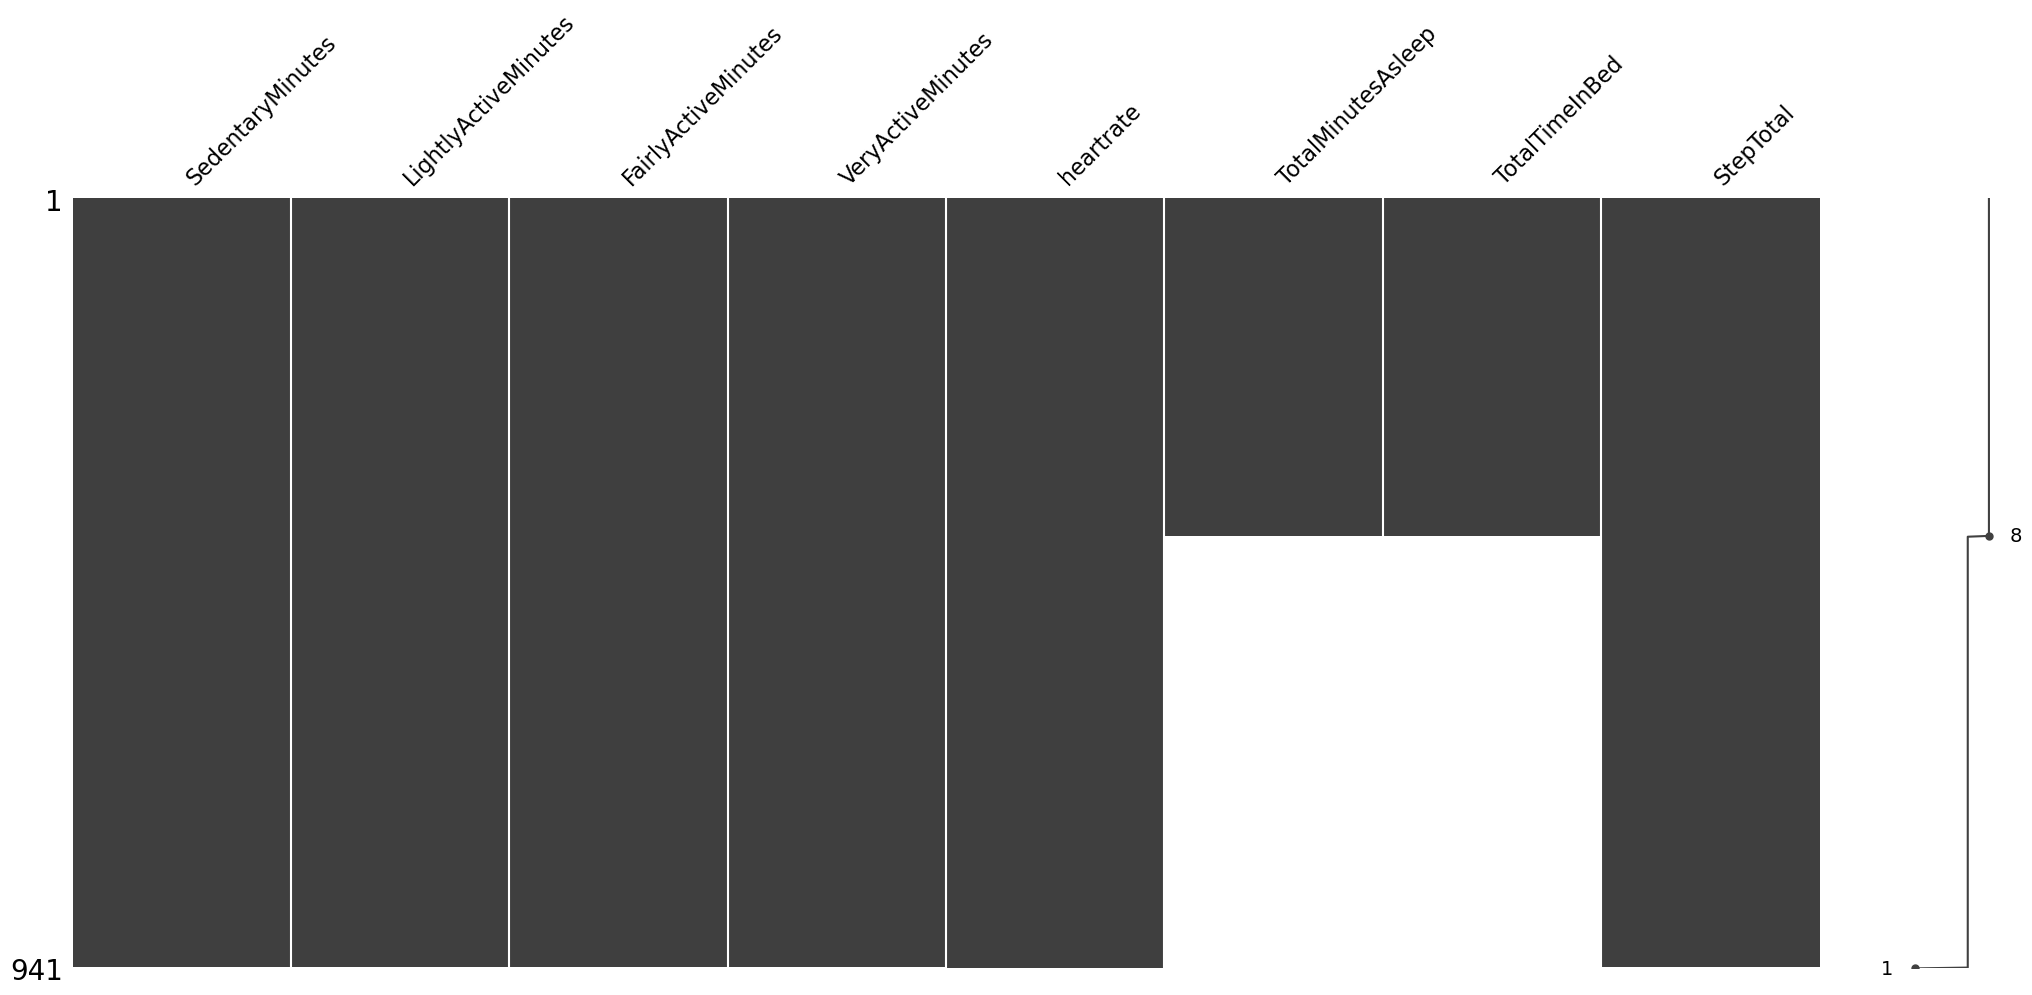

In [36]:
msno.matrix(df)
plt.show()

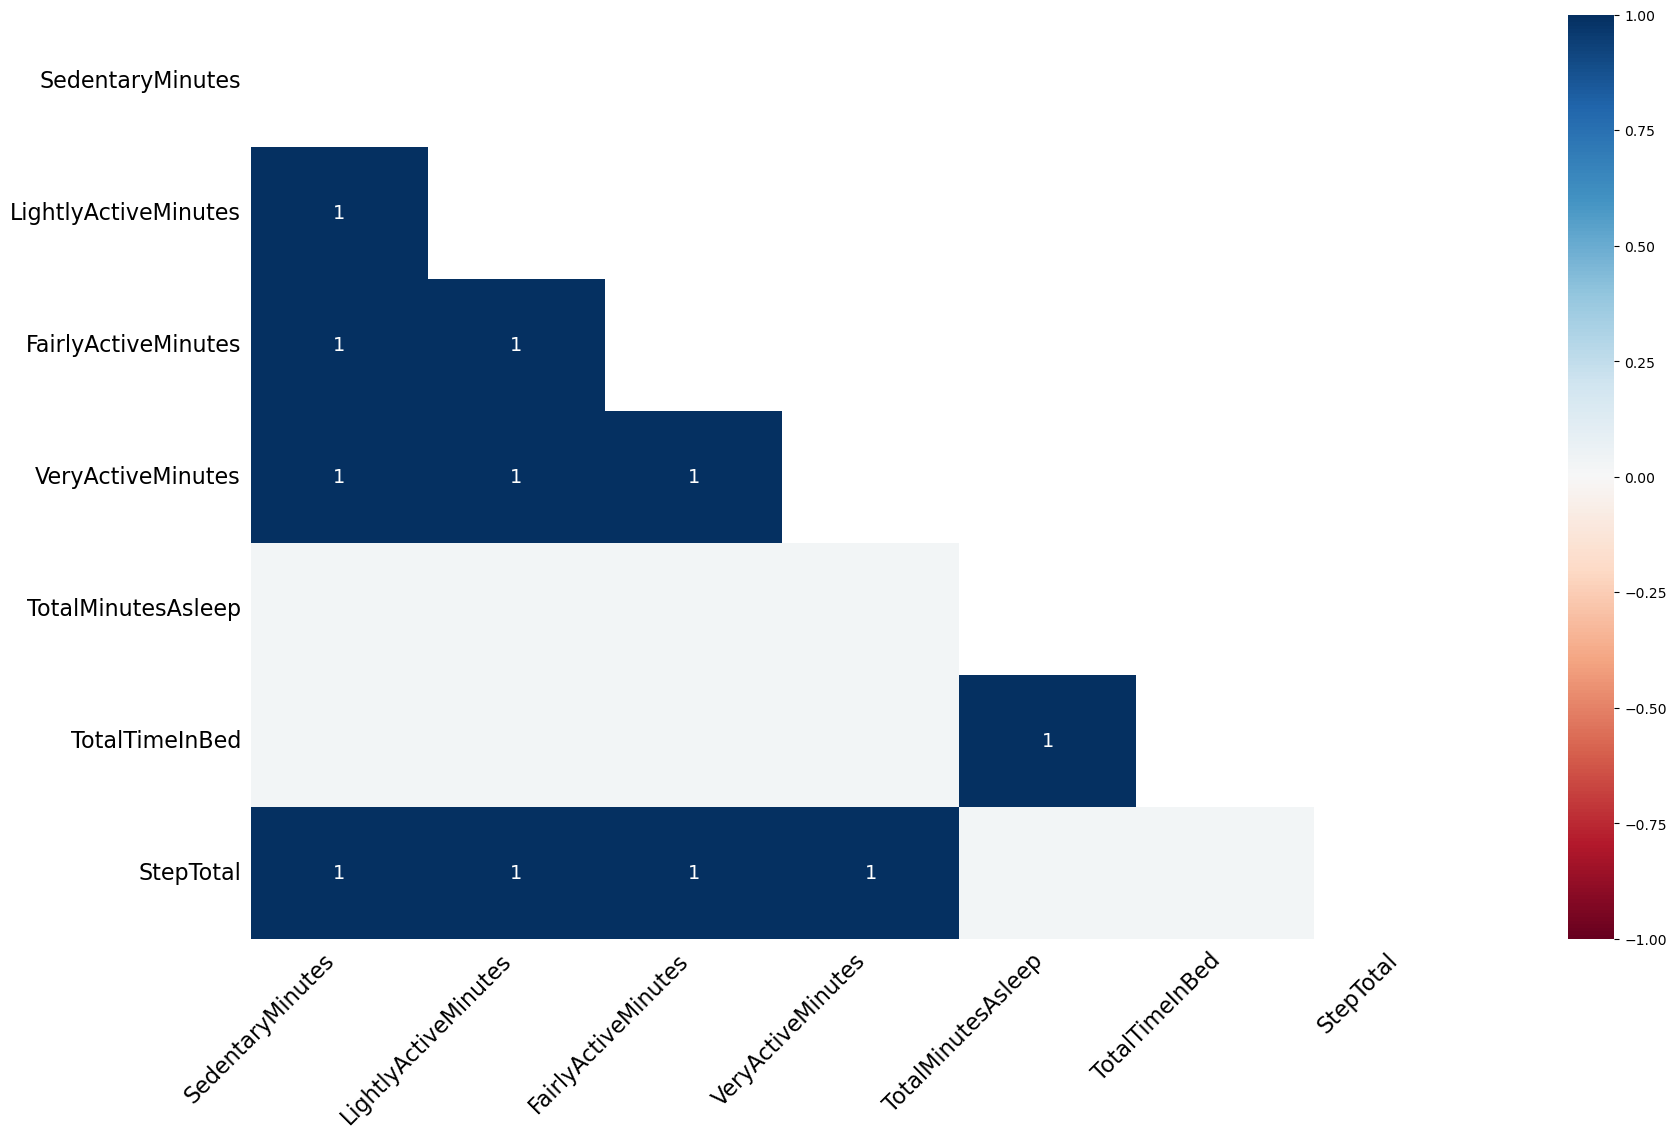

In [37]:
msno.heatmap(df)
plt.show()

In [38]:
#Eksik Değer Problemini Çözme

df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)


In [39]:
df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000
..                ...                   ...                  ...                ...        ...                 ...             ...        ...
408           490.000               374.000               14.000              2.000         62             343.000         360.000  10378.000
409           555.000               329.000               12.000              3.000         62             503.000         527.000   9487.000
410           574.000               311.000               18.000              3.000         62             415.000         423.000   9129.000
411             0.000                 2.000                0.000              0.000         60             516.000         545.000     17.000
412          1440.000                 0.000                0.000              0.000         60             439.000         463.000  10122.000

[413 rows x 8 columns]

In [40]:
df.isnull().sum()


SedentaryMinutes        0
LightlyActiveMinutes    0
FairlyActiveMinutes     0
VeryActiveMinutes       0
heartrate               0
TotalMinutesAsleep      0
TotalTimeInBed          0
StepTotal               0
dtype: int64

In [41]:
df.isnull().values.any()

False

# Özellik Ölçeklendirme

In [42]:
# Yeni değişkenlerin hesaplanması
df['active_life'] = df.loc[:, "FairlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] 


In [43]:
df["sleep_quality"] = df.loc[:, "TotalMinutesAsleep"] / df.loc[:, "TotalTimeInBed"]

In [44]:
df["active_total_time"] = df.loc[:, "LightlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] + df.loc[:, "FairlyActiveMinutes"] 
#toplamegzersizdakikası

In [45]:
#average_movement_speed =  adım/dk
df["average_movement_speed"] = df.loc[:, "StepTotal"] / df.loc[:, "active_total_time"]


In [46]:
df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000       38.000          0.945            366.000                  35.962
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000       40.000          0.943            257.000                  41.770
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000       41.000          0.932            222.000                  47.117
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000       63.000          0.926            272.000                  35.890
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000       46.000          0.962            267.000                  47.449
..                ...                   ...                  ...                ...        ...                 ...             ...        ...          ...            ...                ...                     ...
408           490.000               374.000               14.000              2.000         62             343.000         360.000  10378.000       16.000          0.953            390.000                  26.610
409           555.000               329.000               12.000              3.000         62             503.000         527.000   9487.000       15.000          0.954            344.000                  27.578
410           574.000               311.000               18.000              3.000         62             415.000         423.000   9129.000       21.000          0.981            332.000                  27.497
411             0.000                 2.000                0.000              0.000         60             516.000         545.000     17.000        0.000          0.947              2.000                   8.500
412          1440.000                 0.000                0.000              0.000         60             439.000         463.000  10122.000        0.000          0.948              0.000                     inf

[413 rows x 12 columns]

In [47]:
df.shape

(413, 12)

In [48]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 413
Variables: 12
cat_cols: 0
num_cols: 12
cat_but_car: 0
num_but_cat: 0


<Axes: >

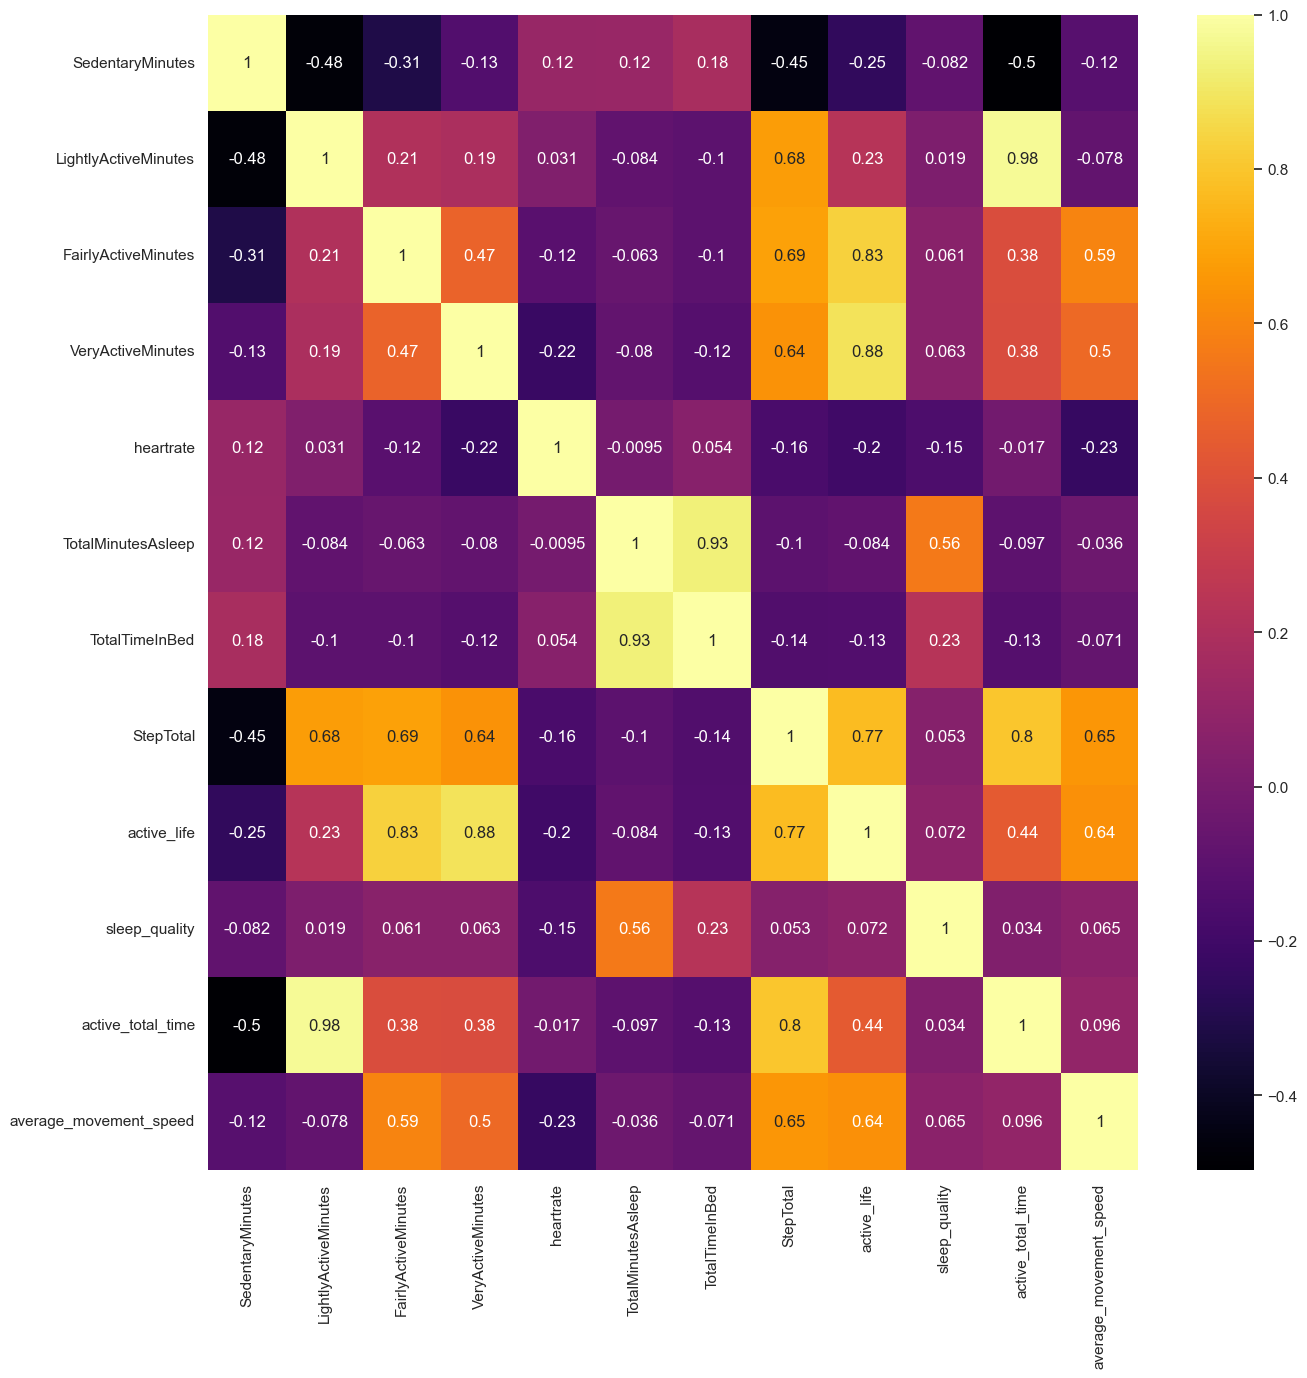

In [49]:
corr=df.corr()

sns.set()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="inferno")

<Axes: >

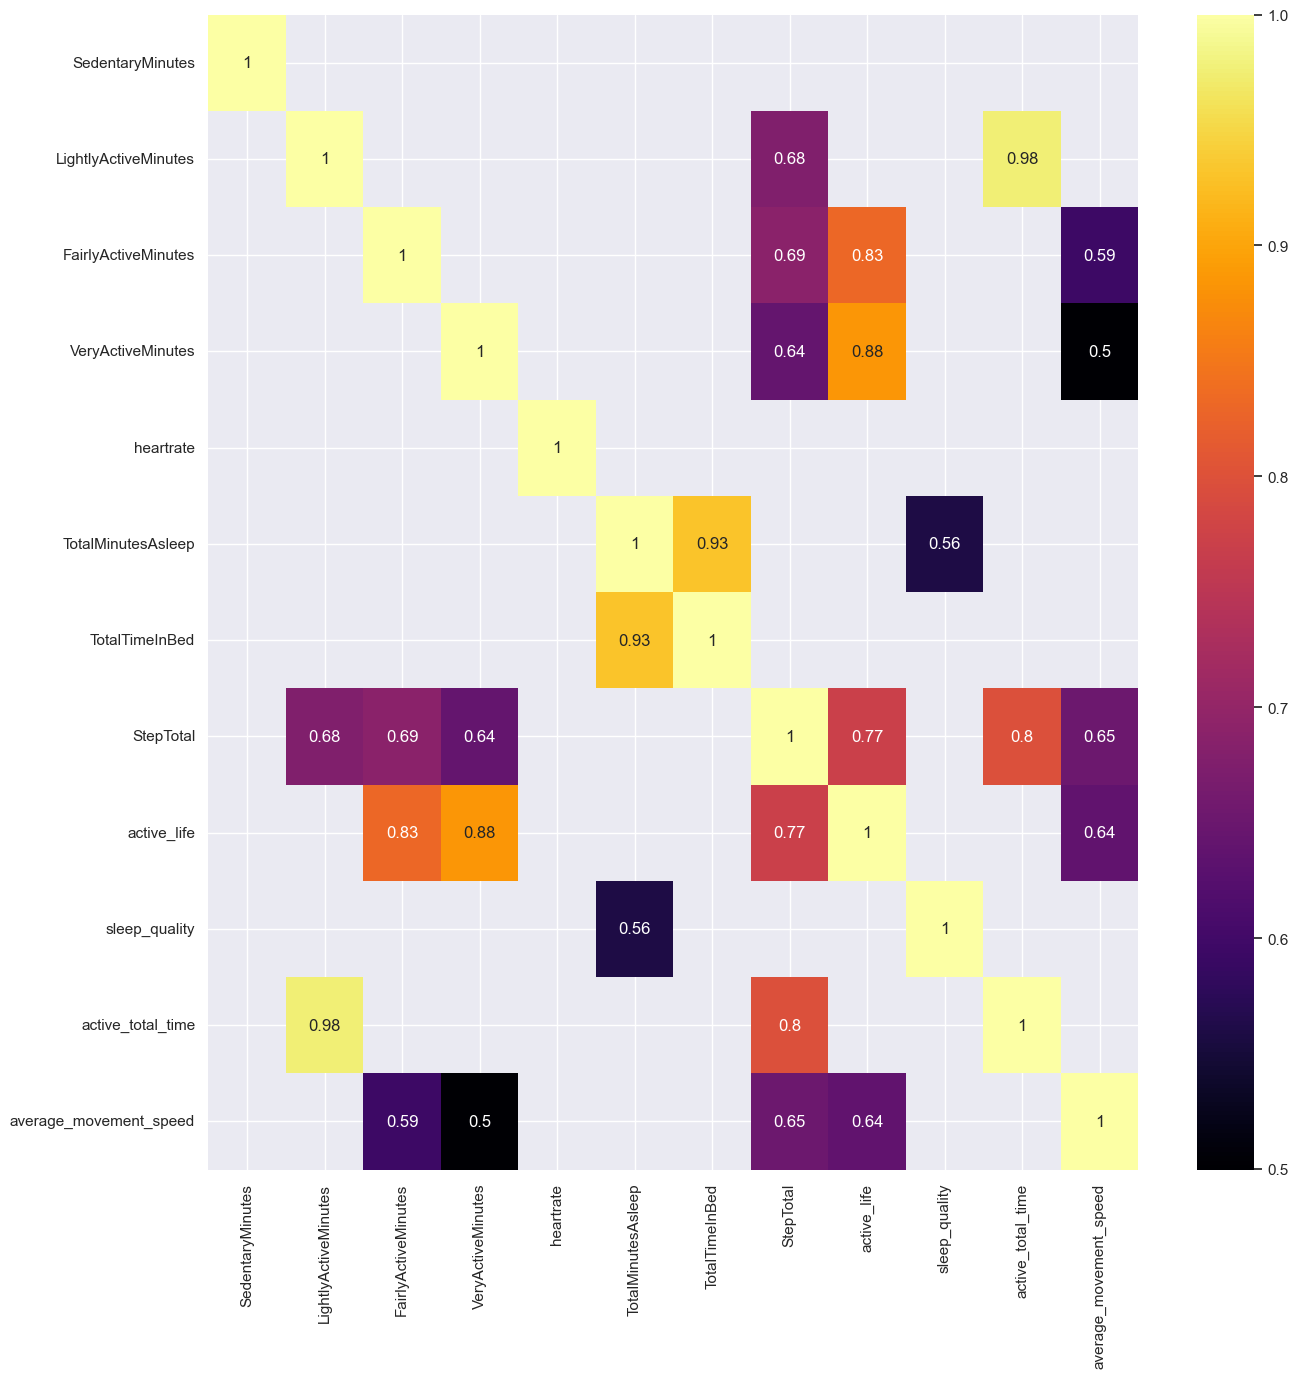

In [50]:
sns.set()
plt.figure(figsize=(15,15))
high_corr=corr[df.corr()>0.49]
sns.heatmap(high_corr, annot=True, cmap="inferno")

In [51]:
df.corr().nlargest(4,"SedentaryMinutes")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
SedentaryMinutes               1.000                -0.476               -0.311             -0.135      0.117               0.118           0.176     -0.453       -0.251         -0.082             -0.496                  -0.122
TotalTimeInBed                 0.176                -0.103               -0.104             -0.124      0.054               0.931           1.000     -0.144       -0.134          0.229             -0.125                  -0.071
TotalMinutesAsleep             0.118                -0.084               -0.063             -0.080     -0.009               1.000           0.931     -0.104       -0.084          0.558             -0.097                  -0.036
heartrate                      0.117                 0.031               -0.116             -0.225      1.000              -0.009           0.054     -0.163       -0.204         -0.154             -0.017                  -0.235

In [52]:
df.corr().nlargest(4,"LightlyActiveMinutes")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
LightlyActiveMinutes            -0.476                 1.000                0.211              0.192      0.031              -0.084          -0.103      0.676        0.234          0.019              0.976                  -0.078
active_total_time               -0.496                 0.976                0.381              0.375     -0.017              -0.097          -0.125      0.797        0.440          0.034              1.000                   0.096
StepTotal                       -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651
active_life                     -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637

In [53]:
df.corr().nlargest(4,"FairlyActiveMinutes")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
FairlyActiveMinutes               -0.311                 0.211                1.000              0.474     -0.116              -0.063          -0.104      0.688        0.831          0.061              0.381                   0.594
active_life                       -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637
StepTotal                         -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651
average_movement_speed            -0.122                -0.078                0.594              0.500     -0.235              -0.036          -0.071      0.651        0.637          0.065              0.096                   1.000

In [54]:
df.corr().nlargest(4,"VeryActiveMinutes")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
VeryActiveMinutes                 -0.135                 0.192                0.474              1.000     -0.225              -0.080          -0.124      0.641        0.884          0.063              0.375                   0.500
active_life                       -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637
StepTotal                         -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651
average_movement_speed            -0.122                -0.078                0.594              0.500     -0.235              -0.036          -0.071      0.651        0.637          0.065              0.096                   1.000

In [55]:
df.corr().nlargest(4,"heartrate")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
heartrate                        0.117                 0.031               -0.116             -0.225      1.000              -0.009           0.054     -0.163       -0.204         -0.154             -0.017                  -0.235
SedentaryMinutes                 1.000                -0.476               -0.311             -0.135      0.117               0.118           0.176     -0.453       -0.251         -0.082             -0.496                  -0.122
TotalTimeInBed                   0.176                -0.103               -0.104             -0.124      0.054               0.931           1.000     -0.144       -0.134          0.229             -0.125                  -0.071
LightlyActiveMinutes            -0.476                 1.000                0.211              0.192      0.031              -0.084          -0.103      0.676        0.234          0.019              0.976                  -0.078

In [56]:
df.corr().nlargest(4,"TotalMinutesAsleep")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
TotalMinutesAsleep             0.118                -0.084               -0.063             -0.080     -0.009               1.000           0.931     -0.104       -0.084          0.558             -0.097                  -0.036
TotalTimeInBed                 0.176                -0.103               -0.104             -0.124      0.054               0.931           1.000     -0.144       -0.134          0.229             -0.125                  -0.071
sleep_quality                 -0.082                 0.019                0.061              0.063     -0.154               0.558           0.229      0.053        0.072          1.000              0.034                   0.065
SedentaryMinutes               1.000                -0.476               -0.311             -0.135      0.117               0.118           0.176     -0.453       -0.251         -0.082             -0.496                  -0.122

In [57]:
df.corr().nlargest(4,"sleep_quality")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
sleep_quality                 -0.082                 0.019                0.061              0.063     -0.154               0.558           0.229      0.053        0.072          1.000              0.034                   0.065
TotalMinutesAsleep             0.118                -0.084               -0.063             -0.080     -0.009               1.000           0.931     -0.104       -0.084          0.558             -0.097                  -0.036
TotalTimeInBed                 0.176                -0.103               -0.104             -0.124      0.054               0.931           1.000     -0.144       -0.134          0.229             -0.125                  -0.071
active_life                   -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637

In [58]:
df.corr().nlargest(4,"active_total_time")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
active_total_time               -0.496                 0.976                0.381              0.375     -0.017              -0.097          -0.125      0.797        0.440          0.034              1.000                   0.096
LightlyActiveMinutes            -0.476                 1.000                0.211              0.192      0.031              -0.084          -0.103      0.676        0.234          0.019              0.976                  -0.078
StepTotal                       -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651
active_life                     -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637

In [59]:
df.corr().nlargest(4,"average_movement_speed")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
average_movement_speed            -0.122                -0.078                0.594              0.500     -0.235              -0.036          -0.071      0.651        0.637          0.065              0.096                   1.000
StepTotal                         -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651
active_life                       -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637
FairlyActiveMinutes               -0.311                 0.211                1.000              0.474     -0.116              -0.063          -0.104      0.688        0.831          0.061              0.381                   0.594

In [60]:
df.corr().nlargest(4,"active_life")

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed
active_life                    -0.251                 0.234                0.831              0.884     -0.204              -0.084          -0.134      0.771        1.000          0.072              0.440                   0.637
VeryActiveMinutes              -0.135                 0.192                0.474              1.000     -0.225              -0.080          -0.124      0.641        0.884          0.063              0.375                   0.500
FairlyActiveMinutes            -0.311                 0.211                1.000              0.474     -0.116              -0.063          -0.104      0.688        0.831          0.061              0.381                   0.594
StepTotal                      -0.453                 0.676                0.688              0.641     -0.163              -0.104          -0.144      1.000        0.771          0.053              0.797                   0.651

In [61]:
def segment_lifestyle(StepTotal, total_high_intensity_exercise, SedentaryMinutes):
    for col in df.columns:
        if (StepTotal > 15000 | total_high_intensity_exercise > 40):
            return "Very_Active_LifeStyle"
        if (StepTotal < 15000 & StepTotal > 10000) | (total_high_intensity_exercise >20 & total_high_intensity_exercise < 40):
            return "Active_LifeStyle"
        if StepTotal < 10000 | total_high_intensity_exercise < 20 | SedentaryMinutes > 450:
            return "Low_Active_LifeStyle"

In [62]:
segment_lifestyle(198, 65, 387)

'Active_LifeStyle'

In [63]:
def segment_lifestyle(row):
    if (row['StepTotal'] > 15000 or row['active_life'] > 40):
        return "Very_Active_LifeStyle"
    if (row['StepTotal'] < 15000 and row['StepTotal'] > 10000) or (row['active_life'] >20 and row['active_life'] < 40):
        return "Active_LifeStyle"
    if row['StepTotal'] < 10000 or row['active_life'] < 20 or row['SedentaryMinutes'] > 450:
        return "Low_Active_LifeStyle"
        
df['segment_lifestyle'] = df.apply(lambda row: segment_lifestyle(row), axis=1)
df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed      segment_lifestyle
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000       38.000          0.945            366.000                  35.962       Active_LifeStyle
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000       40.000          0.943            257.000                  41.770       Active_LifeStyle
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000       41.000          0.932            222.000                  47.117  Very_Active_LifeStyle
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000       63.000          0.926            272.000                  35.890  Very_Active_LifeStyle
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000       46.000          0.962            267.000                  47.449  Very_Active_LifeStyle
..                ...                   ...                  ...                ...        ...                 ...             ...        ...          ...            ...                ...                     ...                    ...
408           490.000               374.000               14.000              2.000         62             343.000         360.000  10378.000       16.000          0.953            390.000                  26.610       Active_LifeStyle
409           555.000               329.000               12.000              3.000         62             503.000         527.000   9487.000       15.000          0.954            344.000                  27.578   Low_Active_LifeStyle
410           574.000               311.000               18.000              3.000         62             415.000         423.000   9129.000       21.000          0.981            332.000                  27.497       Active_LifeStyle
411             0.000                 2.000                0.000              0.000         60             516.000         545.000     17.000        0.000          0.947              2.000                   8.500   Low_Active_LifeStyle
412          1440.000                 0.000                0.000              0.000         60             439.000         463.000  10122.000        0.000          0.948              0.000                     inf       Active_LifeStyle

[413 rows x 13 columns]

In [64]:
def segment_sleepquality(sleep_quality):
    for col in df.columns:
        if sleep_quality >= 0.900:
            return "High Sleep Quality"
        if sleep_quality >= 0.800 and sleep_quality < 0.890:
            return "Normal Sleep Quality"
        if sleep_quality <= 0.890:
            return "Low Sleep Quality"

In [65]:
segment_sleepquality(0.800)

'Normal Sleep Quality'

In [66]:
def segment_sleepquality(row):
    if(row["sleep_quality"] >= 0.900):
        return "High Sleep Quality"
    if(row["sleep_quality"] >= 0.800 and row["sleep_quality"] < 0.899):
        return "Normal Sleep Quality"
    if(row["sleep_quality"] <= 0.899):
        return "Low Sleep Quality"
        
df['segment_sleepquality'] = df.apply(lambda row: segment_sleepquality(row), axis=1)
df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed      segment_lifestyle segment_sleepquality
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000       38.000          0.945            366.000                  35.962       Active_LifeStyle   High Sleep Quality
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000       40.000          0.943            257.000                  41.770       Active_LifeStyle   High Sleep Quality
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000       41.000          0.932            222.000                  47.117  Very_Active_LifeStyle   High Sleep Quality
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000       63.000          0.926            272.000                  35.890  Very_Active_LifeStyle   High Sleep Quality
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000       46.000          0.962            267.000                  47.449  Very_Active_LifeStyle   High Sleep Quality
..                ...                   ...                  ...                ...        ...                 ...             ...        ...          ...            ...                ...                     ...                    ...                  ...
408           490.000               374.000               14.000              2.000         62             343.000         360.000  10378.000       16.000          0.953            390.000                  26.610       Active_LifeStyle   High Sleep Quality
409           555.000               329.000               12.000              3.000         62             503.000         527.000   9487.000       15.000          0.954            344.000                  27.578   Low_Active_LifeStyle   High Sleep Quality
410           574.000               311.000               18.000              3.000         62             415.000         423.000   9129.000       21.000          0.981            332.000                  27.497       Active_LifeStyle   High Sleep Quality
411             0.000                 2.000                0.000              0.000         60             516.000         545.000     17.000        0.000          0.947              2.000                   8.500   Low_Active_LifeStyle   High Sleep Quality
412          1440.000                 0.000                0.000              0.000         60             439.000         463.000  10122.000        0.000          0.948              0.000                     inf       Active_LifeStyle   High Sleep Quality

[413 rows x 14 columns]

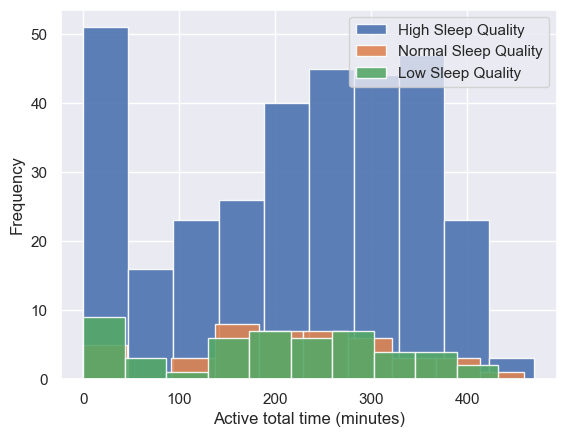

In [67]:
# Her bir gruptaki egzersiz sürelerinin histogramını çiz
for segment in ["High Sleep Quality", "Normal Sleep Quality", "Low Sleep Quality"]:
    plt.hist(df[df['segment_sleepquality'] == segment]['active_total_time'], alpha=0.9, label=segment)
    
plt.legend(loc='upper right')
plt.xlabel('Active total time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [68]:
def segment_heartrate(heartrate):
    for col in df.columns:
        if heartrate  >= 100:
            return "High Heartrate"
        if heartrate >= 60 and heartrate < 100:
            return "Normal Heartrate"
        if sleep_quality < 60:
            return "Low Heartrate"

In [69]:
segment_heartrate(90)

'Normal Heartrate'

In [70]:
def segment_heartrate(row):
    if(row["heartrate"] >= 100):
        return "High Heartrate"
    if(row["heartrate"] >= 60 and row["heartrate"] < 100):
        return "Normal Heartrate"
    if(row["sleep_quality"] < 60):
        return "Low Heartrate"
        
df['segment_heartrate'] = df.apply(lambda row: segment_heartrate(row), axis=1)
df

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal  active_life  sleep_quality  active_total_time  average_movement_speed      segment_lifestyle segment_sleepquality segment_heartrate
0             728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000       38.000          0.945            366.000                  35.962       Active_LifeStyle   High Sleep Quality     Low Heartrate
1             776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000       40.000          0.943            257.000                  41.770       Active_LifeStyle   High Sleep Quality     Low Heartrate
2            1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000       41.000          0.932            222.000                  47.117  Very_Active_LifeStyle   High Sleep Quality     Low Heartrate
3             726.000               209.000               34.000             29.000         58             340.000         367.000   9762.000       63.000          0.926            272.000                  35.890  Very_Active_LifeStyle   High Sleep Quality     Low Heartrate
4             773.000               221.000               10.000             36.000         60             683.500         710.500  12669.000       46.000          0.962            267.000                  47.449  Very_Active_LifeStyle   High Sleep Quality  Normal Heartrate
..                ...                   ...                  ...                ...        ...                 ...             ...        ...          ...            ...                ...                     ...                    ...                  ...               ...
408           490.000               374.000               14.000              2.000         62             343.000         360.000  10378.000       16.000          0.953            390.000                  26.610       Active_LifeStyle   High Sleep Quality  Normal Heartrate
409           555.000               329.000               12.000              3.000         62             503.000         527.000   9487.000       15.000          0.954            344.000                  27.578   Low_Active_LifeStyle   High Sleep Quality  Normal Heartrate
410           574.000               311.000               18.000              3.000         62             415.000         423.000   9129.000       21.000          0.981            332.000                  27.497       Active_LifeStyle   High Sleep Quality  Normal Heartrate
411             0.000                 2.000                0.000              0.000         60             516.000         545.000     17.000        0.000          0.947              2.000                   8.500   Low_Active_LifeStyle   High Sleep Quality  Normal Heartrate
412          1440.000                 0.000                0.000              0.000         60             439.000         463.000  10122.000        0.000          0.948              0.000                     inf       Active_LifeStyle   High Sleep Quality  Normal Heartrate

[413 rows x 15 columns]

In [71]:
cat_cols

[]

In [72]:
df_lifestyle = df.drop(["segment_sleepquality", "segment_heartrate", "TotalMinutesAsleep", "TotalTimeInBed", "sleep_quality"], axis=1)


In [73]:
df_lifestyle

SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  StepTotal  active_life  active_total_time  average_movement_speed      segment_lifestyle
0             728.000               328.000               13.000             25.000         56  13162.000       38.000            366.000                  35.962       Active_LifeStyle
1             776.000               217.000               19.000             21.000         58  10735.000       40.000            257.000                  41.770       Active_LifeStyle
2            1218.000               181.000               11.000             30.000         57  10460.000       41.000            222.000                  47.117  Very_Active_LifeStyle
3             726.000               209.000               34.000             29.000         58   9762.000       63.000            272.000                  35.890  Very_Active_LifeStyle
4             773.000               221.000               10.000             36.000         60  12669.000       46.000            267.000                  47.449  Very_Active_LifeStyle
..                ...                   ...                  ...                ...        ...        ...          ...                ...                     ...                    ...
408           490.000               374.000               14.000              2.000         62  10378.000       16.000            390.000                  26.610       Active_LifeStyle
409           555.000               329.000               12.000              3.000         62   9487.000       15.000            344.000                  27.578   Low_Active_LifeStyle
410           574.000               311.000               18.000              3.000         62   9129.000       21.000            332.000                  27.497       Active_LifeStyle
411             0.000                 2.000                0.000              0.000         60     17.000        0.000              2.000                   8.500   Low_Active_LifeStyle
412          1440.000                 0.000                0.000              0.000         60  10122.000        0.000              0.000                     inf       Active_LifeStyle

[413 rows x 10 columns]

In [74]:
df_lifestyle.to_csv("df_lifestyle.csv", index=False)

In [75]:
df_lifestyle.isnull().sum()

SedentaryMinutes           0
LightlyActiveMinutes       0
FairlyActiveMinutes        0
VeryActiveMinutes          0
heartrate                  0
StepTotal                  0
active_life                0
active_total_time          0
average_movement_speed    40
segment_lifestyle          0
dtype: int64

In [76]:
#Eksik Değer Problemini Çözme

df_lifestyle.dropna(inplace=True)
df_lifestyle.dropna(axis=1, inplace=True)

In [77]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_lifestyle, cat_th=5, car_th=20)

Observations: 373
Variables: 10
cat_cols: 1
num_cols: 9
cat_but_car: 0
num_but_cat: 0


In [78]:
for col in cat_cols:
    cat_summary(df, col)

                       segment_lifestyle  Ratio
Low_Active_LifeStyle                 247 59.806
Very_Active_LifeStyle                106 25.666
Active_LifeStyle                      60 14.528
##########################################


# RECOMMENDATİON
-  LİFESTYLE RECOMMENDATİON
-  SLEEP QUALİTY RECOMMENDATİON

In [79]:
# LİFESTYLE RECOMMENDATİON

In [80]:
def segment_lifestyle(row):
    if (row['StepTotal'] > 15000 or row['active_life'] > 40):
        return "Very_Active_LifeStyle"
    if (row['StepTotal'] < 15000 and row['StepTotal'] > 10000) or (row['active_life'] >20 and row['active_life'] < 40):
        return "Active_LifeStyle"
    if row['StepTotal'] < 10000 or row['active_life'] < 20 or row['SedentaryMinutes'] > 450:
        return "Low_Active_LifeStyle"
        
df_lifestyle['segment_lifestyle'] = df_lifestyle.apply(lambda row: segment_lifestyle(row), axis=1)

In [81]:
def life_style_recommendation(segment_lifestyle):
    if segment_lifestyle == "Very_Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports35%")
    elif segment_lifestyle == "Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports_35%")
    else:
        print("IT'S TIME TO MOVE!")
        print("Being inactive for such a long time poses a significant risk to your health.")
        print("Start moving by doing the exercise routine in the video provided here every day: https://www.youtube.com/watch?v=DYuw4f1c4xs")
        print("It's time to get active! How about having a personal fitness coach always by your side?")
        print("Visit Fitbit.com/coaches page, choose a coach that you think is suitable for you, and "\
              "get a chance to experience 2 months of free coaching. Your code: Coach_2Months_Free")


In [82]:
def segment_lifestyle_recommendation(step_total, active_life, sedentary_minutes):
    segment = segment_lifestyle({'StepTotal': step_total, 'active_life': active_life, 'SedentaryMinutes': sedentary_minutes})
    life_style_recommendation(segment)

In [83]:
segment_lifestyle_recommendation(198, 65, 387)


YOU'RE DOING GREAT!
Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months
Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports35%


In [84]:
# SLEEP QUALİTY RECOMMENDATİON

In [85]:
df_sleepquality = df.drop(["segment_lifestyle", "segment_heartrate"], axis=1)


In [86]:
def segment_sleepquality(row):
    if(row["sleep_quality"] >= 0.900):
        return "High Sleep Quality"
    if(row["sleep_quality"] >= 0.800 and row["sleep_quality"] < 0.899):
        return "Normal Sleep Quality"
    if(row["sleep_quality"] <= 0.899):
        return "Low Sleep Quality"
        
df_sleepquality['segment_sleepquality'] = df_sleepquality.apply(lambda row: segment_sleepquality(row), axis=1)

In [87]:
def sleep_quality_recommendation(segment_sleepquality):
    if segment_sleepquality == "High Sleep Quality":
        print("YOU'RE DOING GREAT!\n• Your code for 2 months of free membership at FitBit Gyms --> Free_2Months\n• Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> FitBit_Sports 35%")
    elif segment_sleepquality == "Normal Sleep Quality":
        print("YOU'RE DOING GREAT!\n• Your code for 2 months of free membership at FitBit Gyms --> Free_2Months\n• Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports_35%")
    else:
        print("IT'S TIME TO MOVE!\n• Being inactive for such a long time poses a significant risk to your health. Start moving by doing the exercise routine in the video provided here every day: https://www.youtube.com/watch?v=DYuw4f1c4xs\n• It's time to get active! How about having a personal fitness coach always by your side? Visit Fitbit.com/coaches page, choose a coach that you think is suitable for you, and get a chance to experience 2 months of free coaching. Your code: Coach_2Months_Free.")


In [88]:
def segment_sleepquality_recommendation(sleep_quality):
    segment = segment_sleepquality({'sleep_quality': sleep_quality})
    sleep_quality_recommendation(segment)

In [89]:
segment_sleepquality_recommendation (0.80)

YOU'RE DOING GREAT!
• Your code for 2 months of free membership at FitBit Gyms --> Free_2Months
• Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports_35%


# PREDİCT
- LİFESTYLE PREDİCT
       
       
- SLEEP QUALİTY PREDİCT
        

# segment_lifestyle PREDİCT


In [ ]:
fig, axes=plt.subplots(ncols=2, nrows=int(len(df.columns)/2), figsize=(10, 28))
fig.tight_layout(pad = 3.0)

for index,i in enumerate(df.drop(columns='segment_lifestyle').columns):
    df01 = df[df.segment_lifestyle=='Very_Active'][str(i)]
    df02 = df[df.segment_lifestyle=='Low'][str(i)]
    df03 = df[df.segment_lifestyle=='Active'][str(i)]

    ax1 = sns.distplot(df01, color = 'blue', ax=axes[int(index/2)][int(index%2)],kde = True)
    ax2 = sns.distplot(df02, color = 'red', ax=axes[int(index/2)][int(index%2)], kde = True)
    ax3 = sns.distplot(df03, color='#00FF00', ax=axes[int(index/2)][int(index%2)], kde=True)


In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

In [ ]:
check_outlier(df, num_cols)

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
check_df(df)


In [ ]:
# Missing Values (Eksik Değerler)
df_lifestyle.isnull().values.any()

In [ ]:
#df = df.fillna(df.mean())


In [ ]:
df_lifestyle.isnull().sum()

In [ ]:
min_rows = df.shape[0]
for col in df.columns:
    if df[col].shape[0] < min_rows:
        min_rows = df[col].shape[0]
print(min_rows)


min_row_count = df.shape[0]
for column in df.columns:
    row_count = df[column].count()
    if row_count < min_row_count:
        min_row_count = row_count

for column in df.columns:
    if df[column].count() > min_row_count:
        df = df.sample(min_row_count, random_state=42).reset_index(drop=True)

df.info()

In [ ]:
df_lifestyle.info()

In [ ]:
from sklearn.utils import resample
df_resampled = resample(df, n_samples=340, replace=False, random_state=42)


In [ ]:
#Train Test Split
y = df_lifestyle["segment_lifestyle"]
X = df_lifestyle.drop(["segment_lifestyle"], axis=1)

In [ ]:
y

In [ ]:
X

In [ ]:
X.info()

In [ ]:
X[np.isinf(X)] = np.nan
X[X > np.finfo(np.float64).max] = np.nan
nans = np.isnan(X)
nan_count = np.count_nonzero(nans)
nan_count

In [ ]:
#NaN olan 2 değeri 0 a dönüştür.
X = np.nan_to_num(X)


In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_lifestyle.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [ ]:
X_train #boyut değişimine bak

In [ ]:
#Tüm veri setinde hedef değişken oranı için:
100 * df["segment_lifestyle"].value_counts() / len(df)

In [ ]:
sns.countplot(x="segment_lifestyle", data=df)
plt.title("LifeStyle Veri Dağılımı")
plt.show()

In [ ]:
# Sınıf frekanslarını hesapla
class_counts = df['segment_lifestyle'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('LifeStyle Veri Seti Sınıf Dağılımı')
plt.show()

In [ ]:
# smote dan önce eğitim setindeki sınıf sayısı
class_counts_before = y_train.value_counts()

In [ ]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
# smote dan sonra eğitim setinin sınıf sayısı
class_counts_after = y_smote.value_counts()

In [ ]:
# iki sınıf sayısını karşılaştırmak için bar grafiği
fig, ax = plt.subplots()
ax.bar(class_counts_before.index, class_counts_before.values, color='b', alpha=0.5, label='Before SMOTE')
ax.bar(class_counts_after.index, class_counts_after.values, color='r', alpha=0.5, label='After SMOTE')
ax.set_xticks(class_counts_before.index)
ax.legend()
ax.set_xlabel('Class')
ax.set_ylabel('Number of samples')
plt.show()

In [ ]:
# iki sınıf sayısını karşılaştırmak için çizgi grafiği
fig, ax = plt.subplots()
ax.plot(class_counts_before.index, class_counts_before.values, color='b', alpha=0.5, label='Before SMOTE')
ax.plot(class_counts_after.index, class_counts_after.values, color='r', alpha=0.5, label='After SMOTE')
ax.set_xticks(class_counts_before.index)
ax.legend()
ax.set_xlabel('Class')
ax.set_ylabel('Number of samples')
plt.show()

In [ ]:
# pasta grafiği
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Before SMOTE')
ax2.pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('After SMOTE')
plt.show()

# MODELLER
- logistic regression
- cart model
- Gradient Boosting Machines ( GBM )
- Light GBM


# 1.  LOGİSTİC REGRESSİON MODEL 

In [ ]:
from sklearn.linear_model import LogisticRegression
# Modelin oluşturulması
lr_model = LogisticRegression()

In [ ]:
# modelin eğitilmesi ve başarı oranı
lr_model.fit(X_smote, y_smote)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

In [ ]:
#micro=0.8666, macro=0.7844, weighted=0.8833
from sklearn.metrics import precision_score, f1_score

precision = precision_score(y_test, y_pred, average="weighted")
print('Precision score:', precision)

In [ ]:
#macro=0.8055, micro=0.8666, weighted=0.86666 
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)


In [ ]:
#micro=0.86666, macro=0.79036, weighted=0.872
f1 = f1_score(y_test, y_pred, average="weighted")
print('F1 score:', f1)

R2 score ve ROC-AUC score, sınıflandırma problemlerinde kullanılmayan, regresyon problemlerinde kullanılan performans metrikleridir. 

In [ ]:
# TRAİN seti üzerinde tahmin, modelin eğitildiği verideki performansı
y_pred = lr_model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(cm, classes=['Active_LifeStyle', 'Very_Active_LifeStyle', 'Low_Active_LifeStyle'], title='Confusion matrix (Train seti)')
plt.show()

In [ ]:
# Test Hatası - Başarısı
#modelin hiç görmediği test seti modele sorulur ve tahminler alınır.
y_pred = lr_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Active_LifeStyle', 'Very_Active_LifeStyle', 'Low_Active_LifeStyle'], title='Confusion matrix (Test seti)')
plt.show()

In [ ]:
# Model sonrası değerler
y_pred = lr_model.predict(X_test)


In [ ]:
X[np.isinf(X)] = np.nan
X[X > np.finfo(np.float64).max] = np.nan
nans = np.isnan(X)
nan_count = np.count_nonzero(nans)
nan_count

In [ ]:
#NaN olan 2 değeri 0 a dönüştür.
X = np.nan_to_num(X)

In [ ]:
#mevcut modelin hipermerteleri nelerdi? bunun için get_params kullan.
lr_model.get_params()

In [ ]:
#range değerlerini verirken parametrelerin ön tanımlı değerlerini içine barındıracak şekilde ayarla.
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l2', 'none'],
             'max_iter': [100, 500, 1000, 5000],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [134]:
lr_best_grid = GridSearchCV(lr_model, lr_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)


In [135]:
lr_best_grid.best_params_

{'C': 1000, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [136]:
#final model oluştur.
lr_final = lr_model.set_params(**lr_best_grid.best_params_, random_state=17).fit(X, y)

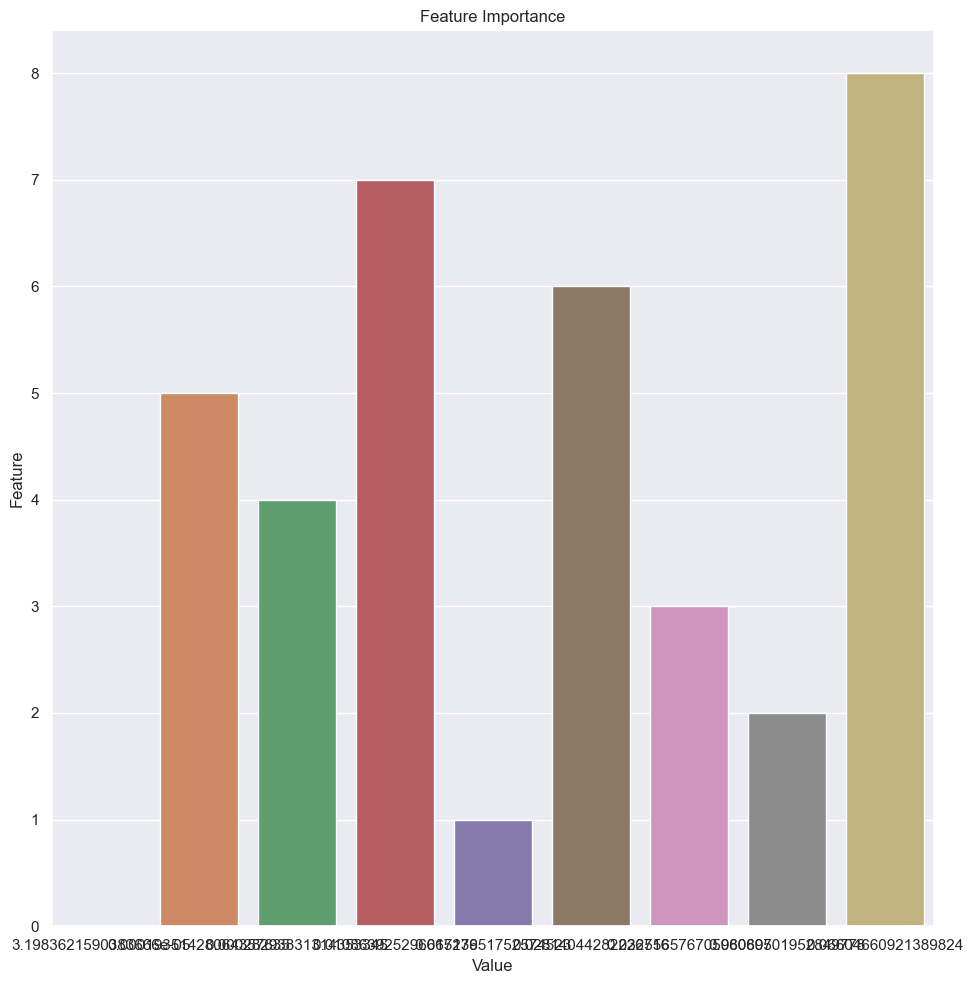

In [137]:
def plot_importance(lr_model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': np.abs(lr_model.coef_[0]), 'Feature': features})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num],ci=None,dodge=False)
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('lr_importances.png')
        
plot_importance(lr_final, np.arange(X.shape[1]))


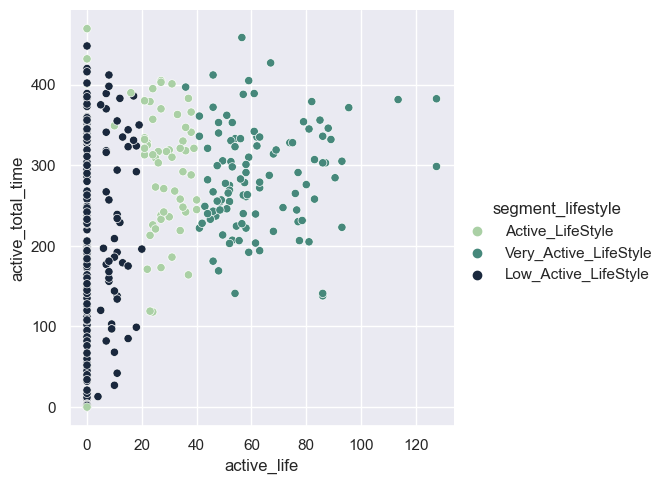

In [138]:
sns.relplot(x="active_life", y="active_total_time",  hue="segment_lifestyle", palette="ch:r=-.5,l=.75", data=df_lifestyle);

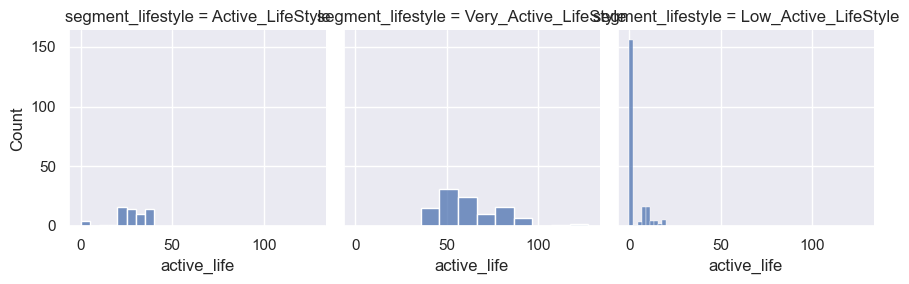

In [139]:
g = sns.FacetGrid(df_lifestyle, col="segment_lifestyle")
g.map(sns.histplot, "active_life")

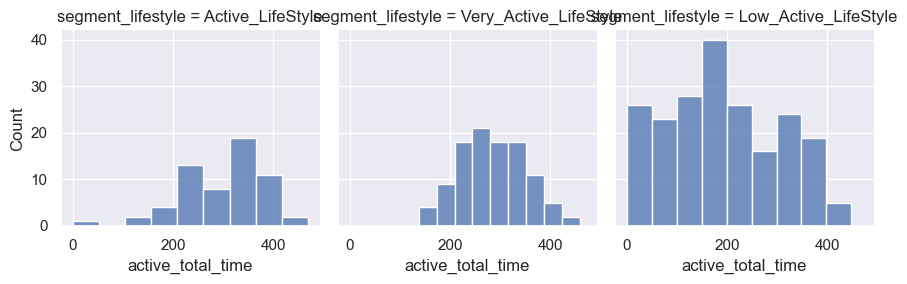

In [140]:
g = sns.FacetGrid(df_lifestyle, col="segment_lifestyle")
g.map(sns.histplot, "active_total_time")

<Axes: xlabel='segment_lifestyle', ylabel='active_total_time'>

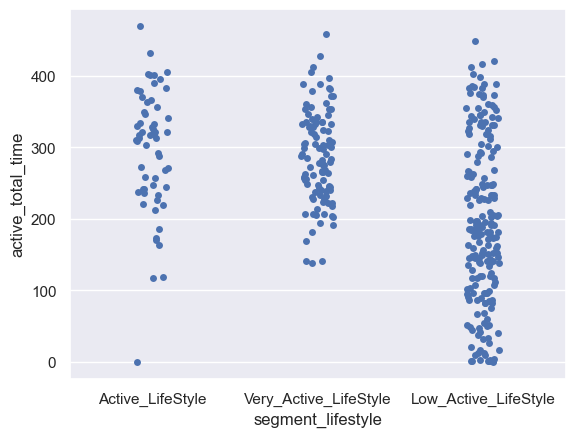

In [141]:
sns.stripplot(y="active_total_time", x="segment_lifestyle", data=df_lifestyle)


<Axes: xlabel='segment_lifestyle', ylabel='active_life'>

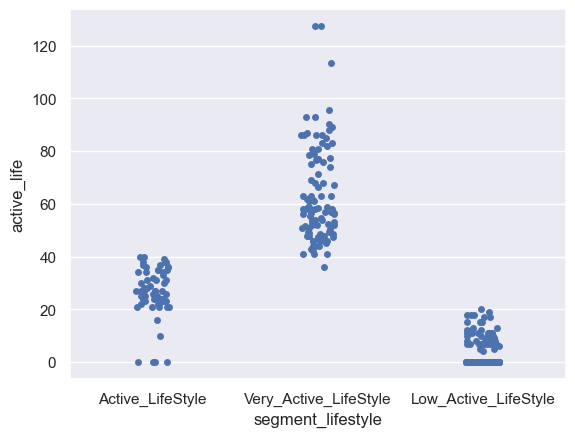

In [142]:
sns.stripplot(y="active_life", x="segment_lifestyle", data=df_lifestyle)

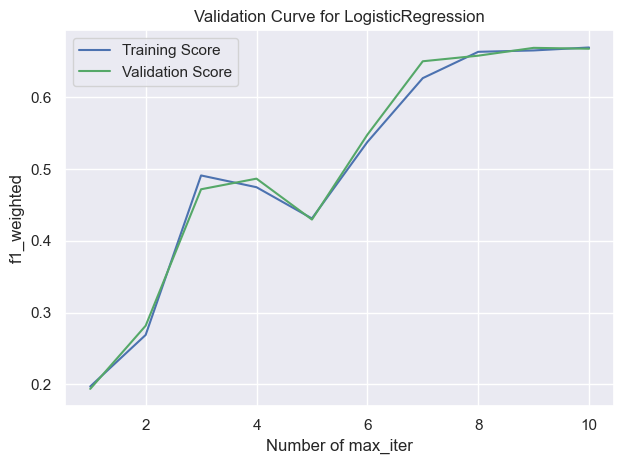

In [143]:
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import make_scorer

#validation curve çalıştır.
def val_curve_params(model, X, y, param_name, param_range, scoring="f1_score", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

#max_iter göre bir değerlendirme yapalım.
val_curve_params(lr_final, X, y, "max_iter", range(1, 11), scoring="f1_weighted")


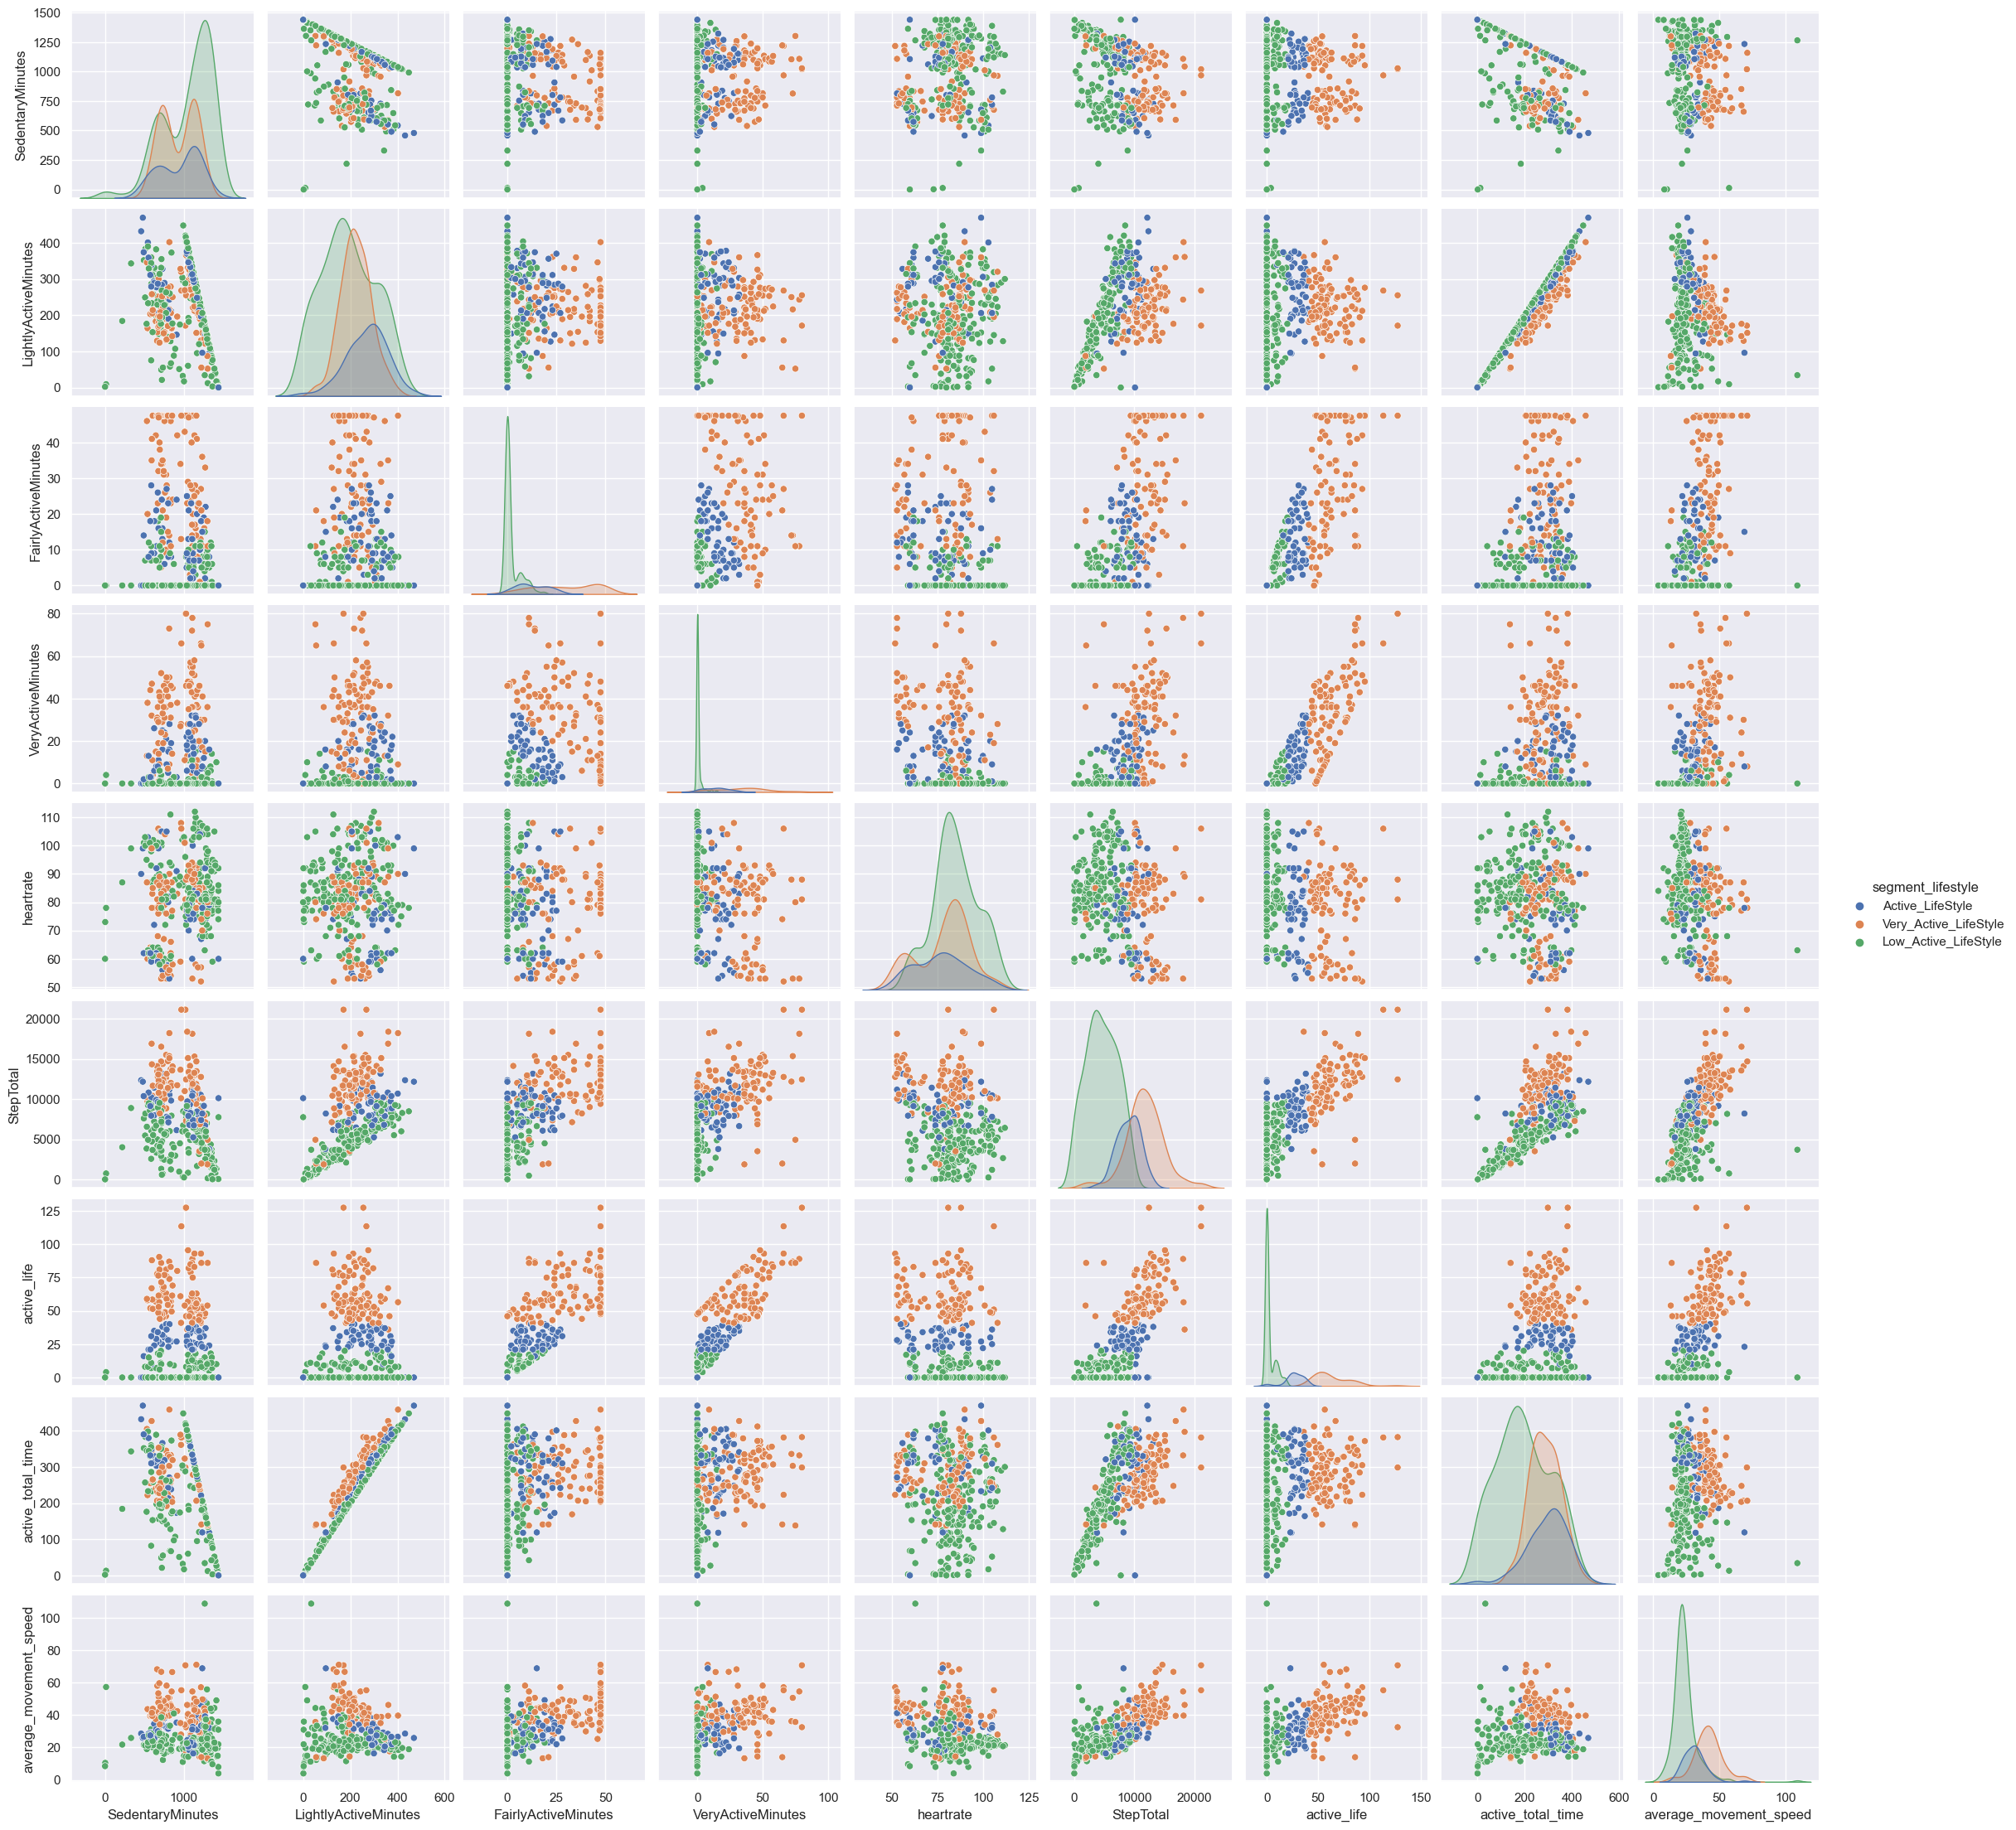

In [144]:
sns.pairplot(data=df_lifestyle, hue = "segment_lifestyle")

In [145]:
lr_model.fit(X_train, y_train)
train_predictions=lr_model.predict(X_train)
print(train_predictions)

['Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Very_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Active_LifeStyle' 'Active_LifeStyle'
 'Low_Active_LifeStyle' 'Lo

In [146]:
precision = precision_score(y_train, train_predictions, average='weighted')
print(precision)

0.9577261623601903


In [147]:
test_predictions=lr_model.predict(X_test)
print(test_predictions)

['Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Active_LifeStyle'
 'Very_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Active_LifeStyle'
 'Very_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Very_Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Low_Active_LifeStyle' 'Active_LifeStyle'
 'Active_LifeStyle' 'Low_Active_LifeStyle' 'Very_Active_LifeStyle'
 'Very_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Very_Active_LifeStyle' 'Low_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Low_Active_LifeStyle' 'Active_LifeStyle' 'Low_Active_LifeStyle'
 'Active_LifeStyle' 'Very_Active_LifeStyle' 'Low_Active_LifeStyle'
 'Very_Active_LifeStyle' 'Active_

In [148]:
precision = precision_score(y_test, test_predictions, average='weighted')
print(precision)

0.9495503948705919


In [149]:
#### Kullanıcı girdilerini alma
SedentaryMinutes = float(input("SedentaryMinutes: "))
LightlyActiveMinutes = float(input("LightlyActiveMinutes: "))
FairlyActiveMinutes = float(input("FairlyActiveMinutes: "))
VeryActiveMinutes = float(input("VeryActiveMinutes: "))
heartrate = float(input("heartrate: "))
StepTotal = float(input("StepTotal: "))
active_life = float(input("active_life: "))
active_total_time = float(input("active_total_time: "))
average_movement_speed = float(input("average_movement_speed: "))

# Girdileri dictionary olarak oluşturma
input_dict = {
    "SedentaryMinutes": [SedentaryMinutes],
    "LightlyActiveMinutes": [LightlyActiveMinutes],
    "FairlyActiveMinutes": [FairlyActiveMinutes],
    "VeryActiveMinutes": [VeryActiveMinutes],
    "heartrate": [heartrate],
    "StepTotal": [StepTotal],
    "active_life": [active_life],
    "active_total_time": [active_total_time],
    "average_movement_speed": [average_movement_speed]
}

# Dictionary'i dataframe'e dönüştürme
df_lifestyle = pd.DataFrame.from_dict(input_dict)

# Tahmin yapma
predicted_segment_lifestyle = lr_model.predict(df_lifestyle)
print(predicted_segment_lifestyle)


SedentaryMinutes: 567
LightlyActiveMinutes: 4345
FairlyActiveMinutes: 3456789
VeryActiveMinutes: 567
heartrate: 4567
StepTotal: 45678
active_life: 5678
active_total_time: 5678
average_movement_speed: 5678
['Low_Active_LifeStyle']


In [150]:
# Modelin başarısını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9375


Precision (weighted): 0.9434


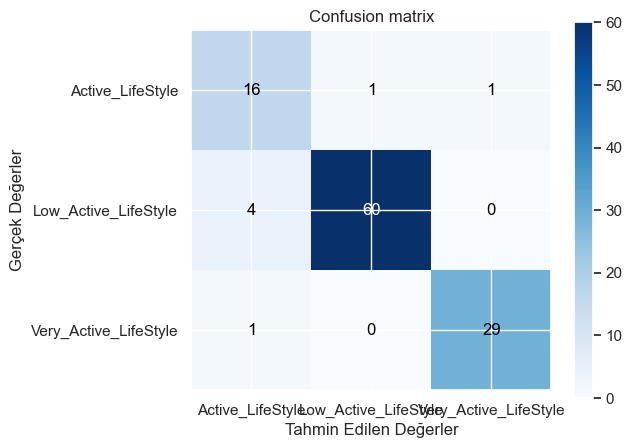

                    y_test                 y_pred
198   Low_Active_LifeStyle   Low_Active_LifeStyle
230   Low_Active_LifeStyle   Low_Active_LifeStyle
71    Low_Active_LifeStyle   Low_Active_LifeStyle
134   Low_Active_LifeStyle   Low_Active_LifeStyle
33    Low_Active_LifeStyle       Active_LifeStyle
..                     ...                    ...
376   Low_Active_LifeStyle   Low_Active_LifeStyle
292   Low_Active_LifeStyle   Low_Active_LifeStyle
154  Very_Active_LifeStyle  Very_Active_LifeStyle
185   Low_Active_LifeStyle   Low_Active_LifeStyle
156       Active_LifeStyle       Active_LifeStyle

[112 rows x 2 columns]


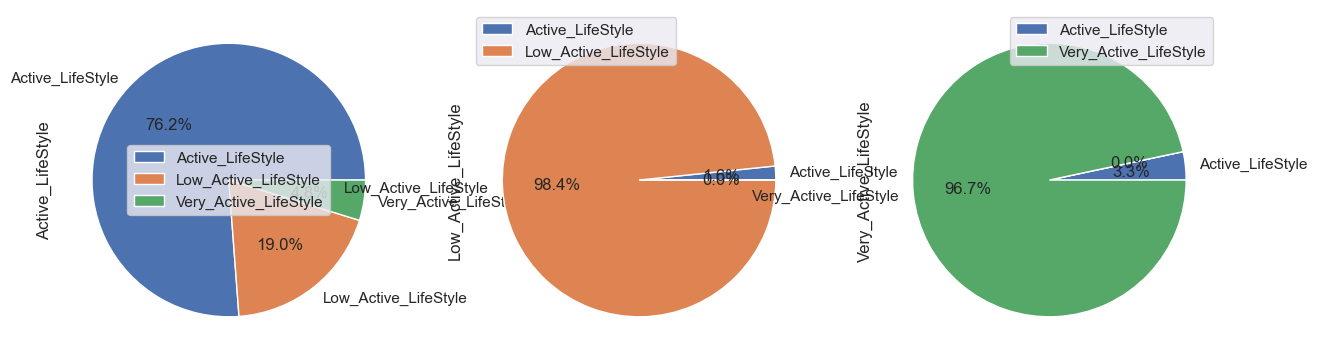

Hata oranı: 0.0566


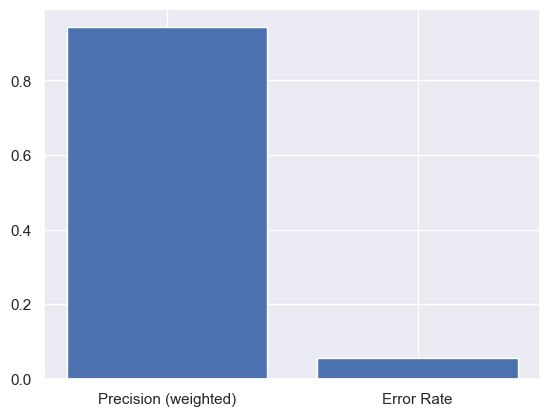

In [151]:

# Modelin precision_weighted metriği ile değerlendirilmesi
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision_weighted:.4f}")

# Confusion Matrix'in oluşturulması
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'in görselleştirilmesi
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=lr_model.classes_, yticklabels=lr_model.classes_,
       title='Confusion matrix',
       ylabel='Gerçek Değerler',
       xlabel='Tahmin Edilen Değerler')

# Confusion Matrix üzerindeki değerlerin yazdırılması
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Confusion Matrix'in gösterilmesi
fig.tight_layout()
plt.show()

# df_result oluşturulması
df_result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# df_result'in yazdırılması
print(df_result)

# df_result'in pasta grafiği ile gösterimi
df_result.groupby(['y_test','y_pred']).size().unstack().plot(kind='pie',subplots=True, figsize=(15, 15),autopct='%1.1f%%')
plt.show()

# Hata oranının hesaplanması ve yazdırılması
error_rate = 1 - precision_weighted
print(f"Hata oranı: {error_rate:.4f}")

# Hata oranının gösterilmesi
plt.bar(['Precision (weighted)', 'Error Rate'], [precision_weighted, error_rate])
plt.show()


********************************* bu modelin devamı gelecek ********************************

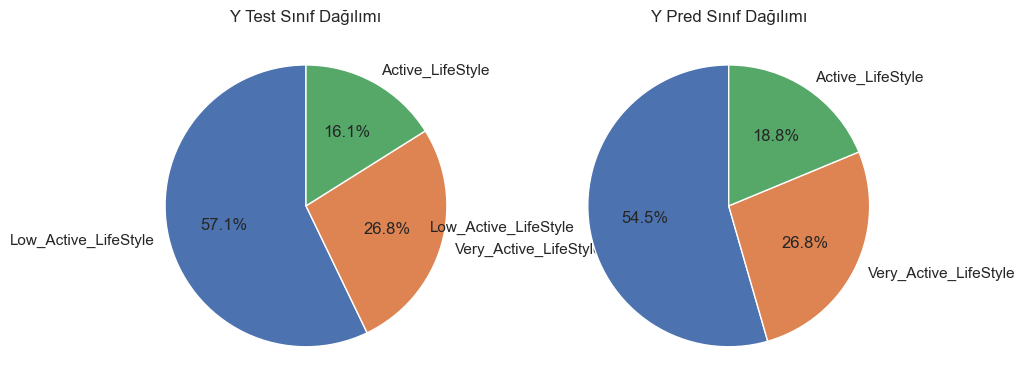

In [152]:
test_counts = df_result['y_test'].value_counts(normalize=True)
pred_counts = df_result['y_pred'].value_counts(normalize=True)

# pasta grafiği oluştur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Y Test Sınıf Dağılımı')
ax2.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Y Pred Sınıf Dağılımı')

plt.show()

In [153]:
# Çapraz doğrulama işlemini gerçekleştir
cv_results = cross_validate(lr_final, X, y, cv=5, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro", "roc_auc_ovr"])

# Skorların ortalamasını alarak başarıyı değerlendir
print('Accuracy: {:.2f}'.format(cv_results['test_accuracy'].mean()))
print('Precision: {:.2f}'.format(cv_results['test_precision_macro'].mean()))
print('Recall: {:.2f}'.format(cv_results['test_recall_macro'].mean()))
print('F1 score: {:.2f}'.format(cv_results['test_f1_macro'].mean()))
print('ROC-AUC: {:.2f}'.format(cv_results['test_roc_auc_ovr'].mean()))

Accuracy: 0.93
Precision: 0.92
Recall: 0.91
F1 score: 0.91
ROC-AUC: 0.97


In [154]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(261, 9) (112, 9) (261,) (112,)


In [155]:

# LabelEncoder'ı oluşturun
label_encoder = LabelEncoder()

# Gerçek değerler (y) için LabelEncoder'ı uygulayın
y = label_encoder.fit_transform(y)

# Tahmin değerlerini (y_pred) uygun şekilde dönüştürün
y_pred = np.where(y_pred == 'High_Active_LifeStyle', 3, np.where(y_pred == 'Normal_Active_LifeStyle', 2, 1))

# Tahmin değerlerini (y_pred) LabelEncoder'ı kullanarak dönüştürün
y_pred = label_encoder.transform(y_pred)


ValueError: y contains previously unseen labels: 1

In [ ]:
print(len(y))
print(len(y_pred))

In [ ]:
y = y[:112]
y_pred = y_pred[:112]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_error_metrics(y, y_pred):
    # Karekök Ortalama Kare Hatası (RMSE) hesaplama
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    # Ortalama Mutlak Hata (MAE) hesaplama
    mae = mean_absolute_error(y, y_pred)
    print("MAE:", mae)

    # MSE (Mean Squared Error) hesaplama
    mse = mean_squared_error(y, y_pred)
    print("MSE:", mse)

print_error_metrics(y, y_pred)

In [ ]:
import matplotlib.pyplot as plt

def plot_error_metrics(y, y_pred):
    error_metrics = ['RMSE', 'MAE',  'MSE']
    error_values = [np.sqrt(mean_squared_error(y, y_pred)),
                    mean_absolute_error(y, y_pred),
                    mean_squared_error(y, y_pred)]

    plt.plot(error_metrics, error_values, marker='o')
    plt.xlabel('Error Metrics')
    plt.ylabel('Error Values')
    plt.title('Error Metrics Comparison')
    plt.grid(True)
    plt.show()

plot_error_metrics(y, y_pred)


In [ ]:
def plot_error_metrics(y, y_pred):
    error_metrics = ['RMSE', 'MAE', 'MSE']
    error_values = [np.sqrt(mean_squared_error(y, y_pred)),
                    mean_absolute_error(y, y_pred),
                    mean_squared_error(y, y_pred)]

    colors = ['red', 'blue', 'orange']  # Her bir sütun için renkleri belirleyin

    # Her bir sütun için ayrı ayrı plt.bar() çağırarak renkleri belirleyin
    for i in range(len(error_metrics)):
        plt.bar(error_metrics[i], error_values[i], color=colors[i])

    plt.xlabel('Error Metrics')
    plt.ylabel('Error Values')
    plt.title('Error Metrics Comparison')
    plt.grid(True)
    plt.show()

plot_error_metrics(y, y_pred)


###### 